## IS453 Financial Analytics
## Group Project

### Credit Scorecard - Ben

**Install scorecardpy**
This is a python version of R package scorecard. The API link has more info :

https://pypi.org/project/scorecardpy/

https://github.com/shichenxie/scorecardpy/

https://cran.r-project.org/web/packages/scorecard/scorecard.pdf

In [1]:
pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
pd.__version__

'1.3.5'

In [3]:
pip install pandas==1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import scorecardpy as sc
import pprint

In [5]:
pd.options.display.max_columns = None


In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# path = "/content/drive/MyDrive/SMU/*SEM 4.2/IS453 - Financial Analytics/ben-group project"

# Filter Data

In [9]:
# sample code
group_data = pd.read_csv('/content/drive/MyDrive/SMU/*SEM 4.2/IS453 - Financial Analytics/ben-group project/IS453 Group Assignment - Data.csv')

df_filtered = group_data[(group_data["OCCUPATION_TYPE"] == 'Drivers') | (group_data["OCCUPATION_TYPE"] == 'Realty agents')  | (group_data["ORGANIZATION_TYPE"] == 'Self-employed') ]


In [10]:
df_filtered 
# 53343 rows × 75 columns

STATUS NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
13           0         Cash loans           M            Y               N             1          225000.0    918468.0      28966.5         697500.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.016612      -14086          -3028             -643.0            -4911         23.0           1               1                0                 1           0           0         Drivers              3.0                     2                            2                   THURSDAY                       13                           0                           0                            0                       0                       0                        0           Self-employed           NaN      0.566907      0.770087          0.1474                       0.0                       0.0                       0.0                       0.0                    -4.0                0                1   
16           0         Cash loans           M            N               N             0          108000.0    509602.5      26149.5         387000.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.018634      -12931          -1317            -6392.0            -3866          NaN           1               1                0                 1           0           0         Drivers              2.0                     2                            2                   THURSDAY                       12                           0                           0                            0                       1                       1                        0              Government           NaN      0.236378      0.062103             NaN                       0.0                       0.0                       0.0                       0.0                    -3.0                0                1   
20           0    Revolving loans           M            Y               Y             0          135000.0    427500.0      21375.0         427500.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.015221      -18252          -4286             -298.0            -1800          7.0           1               1                0                 1           0           0        Laborers              2.0                     2                            2                     FRIDAY                       13                           0                           0                            0                       0                       0                        0           Self-employed      0.565655      0.113375           NaN          0.0722                       0.0                       0.0                       0.0                       0.0                  -296.0                0                0   
22           0         Cash loans           F           

In [11]:
df_filtered_forsc = df_filtered.copy()
df_filtered_forsc

STATUS NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
13           0         Cash loans           M            Y               N             1          225000.0    918468.0      28966.5         697500.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.016612      -14086          -3028             -643.0            -4911         23.0           1               1                0                 1           0           0         Drivers              3.0                     2                            2                   THURSDAY                       13                           0                           0                            0                       0                       0                        0           Self-employed           NaN      0.566907      0.770087          0.1474                       0.0                       0.0                       0.0                       0.0                    -4.0                0                1   
16           0         Cash loans           M            N               N             0          108000.0    509602.5      26149.5         387000.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.018634      -12931          -1317            -6392.0            -3866          NaN           1               1                0                 1           0           0         Drivers              2.0                     2                            2                   THURSDAY                       12                           0                           0                            0                       1                       1                        0              Government           NaN      0.236378      0.062103             NaN                       0.0                       0.0                       0.0                       0.0                    -3.0                0                1   
20           0    Revolving loans           M            Y               Y             0          135000.0    427500.0      21375.0         427500.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.015221      -18252          -4286             -298.0            -1800          7.0           1               1                0                 1           0           0        Laborers              2.0                     2                            2                     FRIDAY                       13                           0                           0                            0                       0                       0                        0           Self-employed      0.565655      0.113375           NaN          0.0722                       0.0                       0.0                       0.0                       0.0                  -296.0                0                0   
22           0         Cash loans           F           

In [12]:
# df_filtered_forsc
# after dropping code gender, days1711 rows x 75 columns

# drop irrelevant/ bias variables
# CODE_GENDER
# DAYS_BIRTH

biased_col = ['CODE_GENDER']
df_filtered_forsc = df_filtered_forsc.drop(columns = biased_col)

In [13]:
# total_null_values_by_col = pd.DataFrame(df_filtered_forsc.isnull().sum(axis = 0))
# total_null_values_by_col['pct_null'] = (total_null_values_by_col[0]/(len(df_filtered_forsc)) * 100).round(5)
# total_null_values_by_col.sort_values(by= 0, ascending= False)

In [14]:
# total_null_values_by_col[total_null_values_by_col['pct_null'] > 10].index

In [15]:
df_filtered_forsc
# 53343 rows × 74

STATUS NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
13           0         Cash loans            Y               N             1          225000.0    918468.0      28966.5         697500.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.016612      -14086          -3028             -643.0            -4911         23.0           1               1                0                 1           0           0         Drivers              3.0                     2                            2                   THURSDAY                       13                           0                           0                            0                       0                       0                        0           Self-employed           NaN      0.566907      0.770087          0.1474                       0.0                       0.0                       0.0                       0.0                    -4.0                0                1                0   
16           0         Cash loans            N               N             0          108000.0    509602.5      26149.5         387000.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.018634      -12931          -1317            -6392.0            -3866          NaN           1               1                0                 1           0           0         Drivers              2.0                     2                            2                   THURSDAY                       12                           0                           0                            0                       1                       1                        0              Government           NaN      0.236378      0.062103             NaN                       0.0                       0.0                       0.0                       0.0                    -3.0                0                1                0   
20           0    Revolving loans            Y               Y             0          135000.0    427500.0      21375.0         427500.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.015221      -18252          -4286             -298.0            -1800          7.0           1               1                0                 1           0           0        Laborers              2.0                     2                            2                     FRIDAY                       13                           0                           0                            0                       0                       0                        0           Self-employed      0.565655      0.113375           NaN          0.0722                       0.0                       0.0                       0.0                       0.0                  -296.0                0                0                0   
22           0         Cash loans   

# pc_missing analysis

In [16]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [17]:
columns_infoDF = show_missing(df_filtered_forsc)

In [18]:
columns_infoDF

variable    dtype  count  unique  missing  pc_missing
0                        STATUS    int64  53343       2        0        0.00
1            NAME_CONTRACT_TYPE   object  53343       2        0        0.00
2                  FLAG_OWN_CAR   object  53343       2        0        0.00
3               FLAG_OWN_REALTY   object  53343       2        0        0.00
4                  CNT_CHILDREN    int64  53343      10        0        0.00
5              AMT_INCOME_TOTAL  float64  53343     433        0        0.00
6                    AMT_CREDIT  float64  53343    3369        0        0.00
7                   AMT_ANNUITY  float64  53343    8726        4        0.01
8               AMT_GOODS_PRICE  float64  53343     497       61        0.11
9               NAME_TYPE_SUITE   object  53343       8      219        0.41
10             NAME_INCOME_TYPE   object  53343       7        0        0.00
11          NAME_EDUCATION_TYPE   object  53343       5        0        0.00
12           NAME_FAMILY_STATUS   object  53343       5        0        0.00
13            NAME_HOUSING_TYPE   object  53343       6        0        0.00
14   REGION_POPULATION_RELATIVE  float64  53343      80        0        0.00
15                   DAYS_BIRTH    int64  53343   13750        0        0.00
16                DAYS_EMPLOYED    int64  53343    6823        0        0.00
17            DAYS_REGISTRATION  float64  53343   11744        0        0.00
18              DAYS_ID_PUBLISH    int64  53343    5729        0        0.00
19                  OWN_CAR_AGE  float64  53343      55    28777       53.95
20                   FLAG_MOBIL    int64  53343       1        0        0.00
21               FLAG_EMP_PHONE    int64  53343       2        0        0.00
22              FLAG_WORK_PHONE    int64  53343       2        0        0.00
23             FLAG_CONT_MOBILE    int64  53343       2        0        0.00
24                   FLAG_PHONE    int64  53343       2        0        0.00
25                   FLAG_EMAIL    int64  53343       2        0        0.00
26              OCCUPATION_TYPE   object  53343      19     3545        6.65
27              CNT_FAM_MEMBERS  float64  53343      11        0        0.00
28         REGION_RATING_CLIENT    int64  53343       3        0        0.00
29  REGION_RATING_CLIENT_W_CITY    int64  53343       3        0        0.00
30   WEEKDAY_APPR_PROCESS_START   object  53343       7        0        0.00
31      HOUR_APPR_PROCESS_START    int64  53343      24        0        0.00
32   REG_REGION_NOT_LIVE_REGION    int64  53343       2        0        0.00
33   REG_REGION_NOT_WORK_REGION    int64  53343       2        0        0.00
34  LIVE_REGION_NOT_WORK_REGION    int64  53343       2        0        0.00
35       REG_CITY_NOT_LIVE_CITY    int64  53343       2        0        0.00
36       REG_CITY_NOT_WORK_CITY    int64  53343       2        0        0.00
37      LIVE_CITY_NOT_WORK_CITY    int64  53343       2        0        0.00
38            ORGANIZATION_TYPE   object  53343      55        0        0.00
39                 EXT_SOURCE_1  float64  53343   23409    29147       54.64
40                 EXT_SOURCE_2  float64  53343   41833      110        0.21
41                 EXT_SOURCE_3  float64  53343     737    12628       23.67
42               APARTMENTS_AVG  float64  53343    1371    29908       56.07
43     OBS_30_CNT_SOCIAL_CIRCLE  float64  53343      27      155        0.29
44     DEF_30_CNT_SOCIAL_CIRCLE  float64  53343       8      155        0.29
45     OBS_60_CNT_SOCIAL_CIRCLE  float64  53343      27      155        0.29
46     DEF_60_CNT_SOCIAL_CIRCLE  float64  53343       7      155        0.29
47       DAYS_LAST_PHONE_CHANGE  float64  53343    3413        0        0.00
48              FLAG_DOCUMENT_2    int64  53343       2        0        0.00
49              FLAG_DOCUMENT_3    int64  53343       2        0        0.00
50              FLAG_DOCUMENT_4    int64  53343       2        0        0.00
51              FLA

### Columns that only have 1 unique value

In [19]:
cat_var_df = columns_infoDF[columns_infoDF['unique'] == 1]
cat_var_df.value_counts()

variable          dtype  count  unique  missing  pc_missing
FLAG_DOCUMENT_12  int64  53343  1       0        0.0           1
FLAG_MOBIL        int64  53343  1       0        0.0           1
dtype: int64

### Categorical Variables

In [20]:
cat_var_df = columns_infoDF[columns_infoDF['dtype'] == 'object']
cat_var_df
# cat_var_df.info() => 11 categorical variables 

variable   dtype  count  unique  missing  pc_missing
1           NAME_CONTRACT_TYPE  object  53343       2        0        0.00
2                 FLAG_OWN_CAR  object  53343       2        0        0.00
3              FLAG_OWN_REALTY  object  53343       2        0        0.00
9              NAME_TYPE_SUITE  object  53343       8      219        0.41
10            NAME_INCOME_TYPE  object  53343       7        0        0.00
11         NAME_EDUCATION_TYPE  object  53343       5        0        0.00
12          NAME_FAMILY_STATUS  object  53343       5        0        0.00
13           NAME_HOUSING_TYPE  object  53343       6        0        0.00
26             OCCUPATION_TYPE  object  53343      19     3545        6.65
30  WEEKDAY_APPR_PROCESS_START  object  53343       7        0        0.00
38           ORGANIZATION_TYPE  object  53343      55        0        0.00

In [21]:
# categorical variables's  list
cat_var_list = list(cat_var_df['variable'])
print(str(len(cat_var_list)) + " Categorical Variables are " + str(cat_var_list))

11 Categorical Variables are ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


### Continous Variables

In [22]:
cont_var_df = columns_infoDF[columns_infoDF['dtype'] != 'object' ]
cont_var_df.head(5)
# cont_var_df.info() => 62 continous variables

variable    dtype  count  unique  missing  pc_missing
0            STATUS    int64  53343       2        0        0.00
4      CNT_CHILDREN    int64  53343      10        0        0.00
5  AMT_INCOME_TOTAL  float64  53343     433        0        0.00
6        AMT_CREDIT  float64  53343    3369        0        0.00
7       AMT_ANNUITY  float64  53343    8726        4        0.01

In [23]:
# continous variables's  list
cont_var_list = list(cont_var_df['variable'])
print(str(len(cont_var_list)) + " Continous Variables are " + str(cont_var_list))

63 Continous Variables are ['STATUS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_1

### Correlation Map

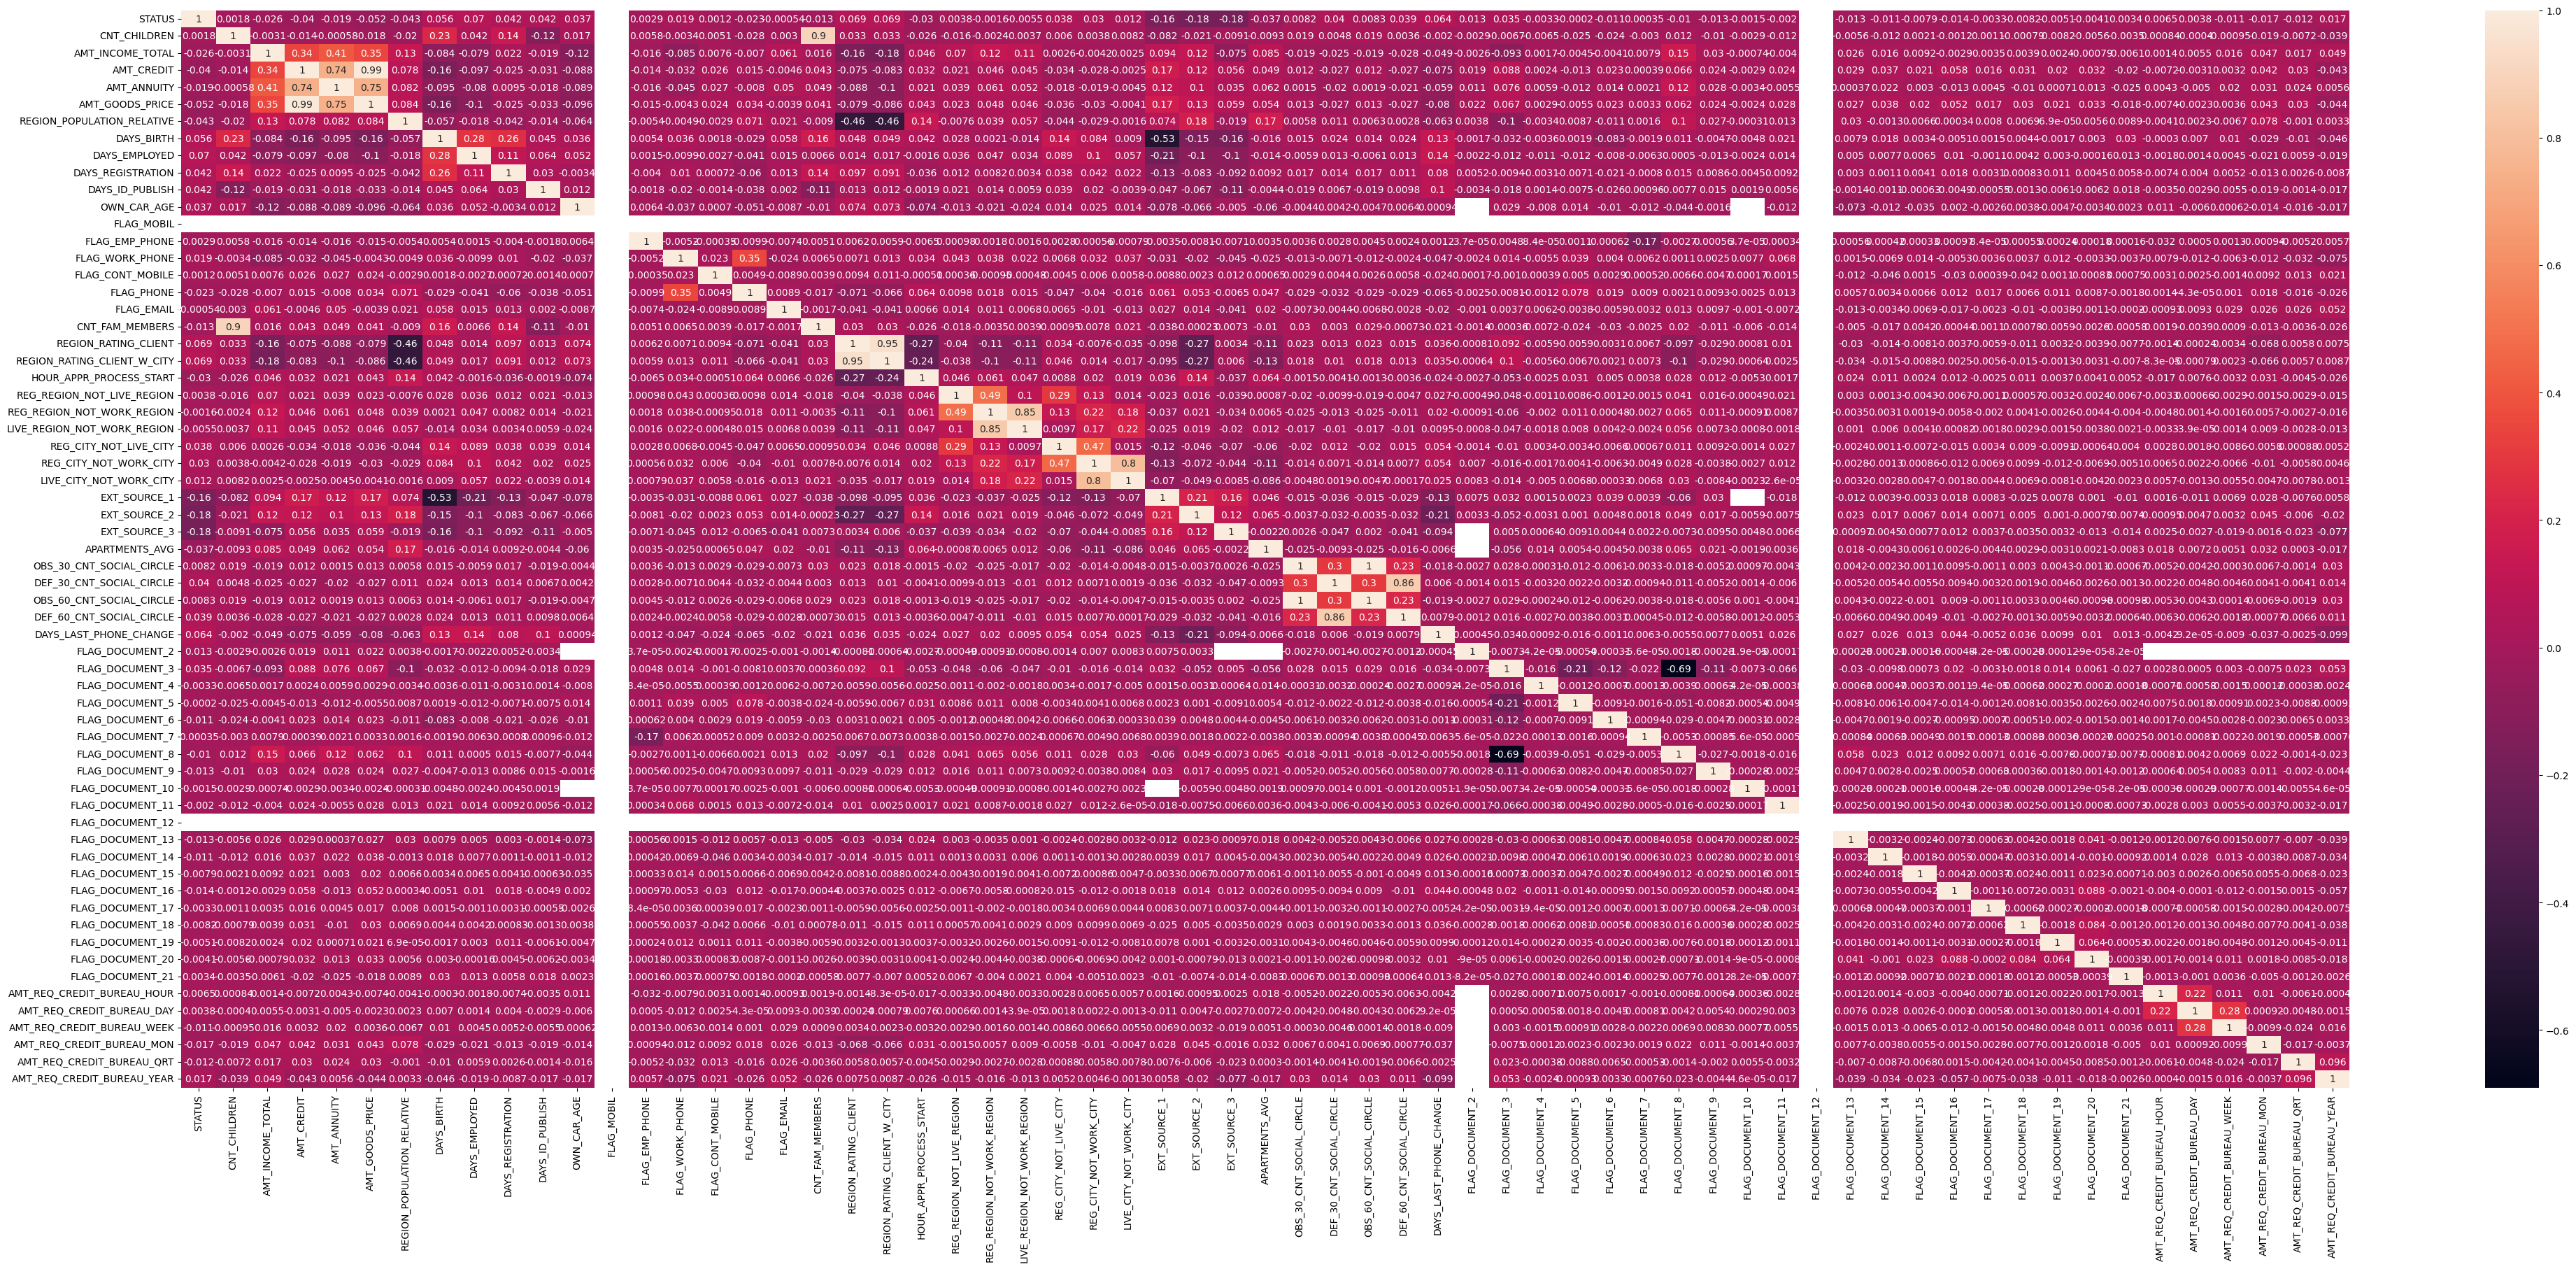

In [24]:
cor = df_filtered_forsc.corr() 
ig, ax = plt.subplots(figsize=(50,20))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, ax=ax)
plt.show()

In [25]:
sol = (df_filtered_forsc.corr().where(np.triu(np.ones(df_filtered_forsc.corr().shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

corr_df = pd.DataFrame(sol)
corr_df.head(20)

0
OBS_30_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE     0.998365
AMT_CREDIT                 AMT_GOODS_PRICE              0.985405
REGION_RATING_CLIENT       REGION_RATING_CLIENT_W_CITY  0.950262
CNT_CHILDREN               CNT_FAM_MEMBERS              0.898583
DEF_30_CNT_SOCIAL_CIRCLE   DEF_60_CNT_SOCIAL_CIRCLE     0.855623
REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  0.848535
REG_CITY_NOT_WORK_CITY     LIVE_CITY_NOT_WORK_CITY      0.798346
AMT_ANNUITY                AMT_GOODS_PRICE              0.746603
AMT_CREDIT                 AMT_ANNUITY                  0.742243
REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION   0.489699
REG_CITY_NOT_LIVE_CITY     REG_CITY_NOT_WORK_CITY       0.466709
AMT_INCOME_TOTAL           AMT_ANNUITY                  0.411748
                           AMT_GOODS_PRICE              0.349042
FLAG_WORK_PHONE            FLAG_PHONE                   0.347463
AMT_INCOME_TOTAL           AMT_CREDIT                   0.344436
DEF_30_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE     0.301858
OBS_30_CNT_SOCIAL_CIRCLE   DEF_30_CNT_SOCIAL_CIRCLE     0.299185
REG_REGION_NOT_LIVE_REGION REG_CITY_NOT_LIVE_CITY       0.294540
DAYS_BIRTH                 DAYS_EMPLOYED                0.277861
AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK   0.277738

# Creating Scorecard

**Scorecardpy requires an older version of pandas to be able to accomodate missing values**

So remove missing values for now to be able to test out scorecardpy

In [26]:
drop_col = ['OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY','CNT_FAM_MEMBERS',
            'DEF_60_CNT_SOCIAL_CIRCLE','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY', 'AMT_GOODS_PRICE',
            'AMT_ANNUITY']
df_filtered_forsc.drop(columns= drop_col, inplace= True)

In [27]:
df_filtered_forsc #53343 rows × 66 columns


STATUS NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
13           0         Cash loans            Y               N             1          225000.0    918468.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.016612      -14086          -3028             -643.0            -4911         23.0           1               1                0                 1           0           0         Drivers                     2                   THURSDAY                       13                           0                           0                       0                       0           Self-employed           NaN      0.566907      0.770087          0.1474                       0.0                       0.0                    -4.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0   
16           0         Cash loans            N               N             0          108000.0    509602.5   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.018634      -12931          -1317            -6392.0            -3866          NaN           1               1                0                 1           0           0         Drivers                     2                   THURSDAY                       12                           0                           0                       1                       1              Government           NaN      0.236378      0.062103             NaN                       0.0                       0.0                    -3.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0   
20           0    Revolving loans            Y               Y             0          135000.0    427500.0   Unaccompanied               Working  Secondary / secondary special            Married  House / apartment                    0.015221      -18252          -4286             -298.0            -1800          7.0           1               1                0                 1           0           0        Laborers                     2                     FRIDAY                       13                           0                           0                       0                       0           Self-employed      0.565655      0.113375           NaN          0.0722                       0.0                       0.0                  -296.0                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0   
22           0         Cash loans            N               N  

Combine flag documents & drop individual flag documents

In [28]:
# flag_docu_list = list(total_null_values_by_col.filter(like="FLAG_DOCUMENT_", axis = 0).index)
# return_str = ''
# for i in range(len(flag_docu_list)):
#     return_str += f"df_filtered_forsc['{flag_docu_list[i]}'] +"
    
# print (return_str)

In [29]:
columns_infoDF = show_missing(df_filtered_forsc)
columns_infoDF

variable    dtype  count  unique  missing  pc_missing
0                       STATUS    int64  53343       2        0        0.00
1           NAME_CONTRACT_TYPE   object  53343       2        0        0.00
2                 FLAG_OWN_CAR   object  53343       2        0        0.00
3              FLAG_OWN_REALTY   object  53343       2        0        0.00
4                 CNT_CHILDREN    int64  53343      10        0        0.00
5             AMT_INCOME_TOTAL  float64  53343     433        0        0.00
6                   AMT_CREDIT  float64  53343    3369        0        0.00
7              NAME_TYPE_SUITE   object  53343       8      219        0.41
8             NAME_INCOME_TYPE   object  53343       7        0        0.00
9          NAME_EDUCATION_TYPE   object  53343       5        0        0.00
10          NAME_FAMILY_STATUS   object  53343       5        0        0.00
11           NAME_HOUSING_TYPE   object  53343       6        0        0.00
12  REGION_POPULATION_RELATIVE  float64  53343      80        0        0.00
13                  DAYS_BIRTH    int64  53343   13750        0        0.00
14               DAYS_EMPLOYED    int64  53343    6823        0        0.00
15           DAYS_REGISTRATION  float64  53343   11744        0        0.00
16             DAYS_ID_PUBLISH    int64  53343    5729        0        0.00
17                 OWN_CAR_AGE  float64  53343      55    28777       53.95
18                  FLAG_MOBIL    int64  53343       1        0        0.00
19              FLAG_EMP_PHONE    int64  53343       2        0        0.00
20             FLAG_WORK_PHONE    int64  53343       2        0        0.00
21            FLAG_CONT_MOBILE    int64  53343       2        0        0.00
22                  FLAG_PHONE    int64  53343       2        0        0.00
23                  FLAG_EMAIL    int64  53343       2        0        0.00
24             OCCUPATION_TYPE   object  53343      19     3545        6.65
25        REGION_RATING_CLIENT    int64  53343       3        0        0.00
26  WEEKDAY_APPR_PROCESS_START   object  53343       7        0        0.00
27     HOUR_APPR_PROCESS_START    int64  53343      24        0        0.00
28  REG_REGION_NOT_LIVE_REGION    int64  53343       2        0        0.00
29  REG_REGION_NOT_WORK_REGION    int64  53343       2        0        0.00
30      REG_CITY_NOT_LIVE_CITY    int64  53343       2        0        0.00
31      REG_CITY_NOT_WORK_CITY    int64  53343       2        0        0.00
32           ORGANIZATION_TYPE   object  53343      55        0        0.00
33                EXT_SOURCE_1  float64  53343   23409    29147       54.64
34                EXT_SOURCE_2  float64  53343   41833      110        0.21
35                EXT_SOURCE_3  float64  53343     737    12628       23.67
36              APARTMENTS_AVG  float64  53343    1371    29908       56.07
37    OBS_30_CNT_SOCIAL_CIRCLE  float64  53343      27      155        0.29
38    DEF_30_CNT_SOCIAL_CIRCLE  float64  53343       8      155        0.29
39      DAYS_LAST_PHONE_CHANGE  float64  53343    3413        0        0.00
40             FLAG_DOCUMENT_2    int64  53343       2        0        0.00
41             FLAG_DOCUMENT_3    int64  53343       2        0        0.00
42             FLAG_DOCUMENT_4    int64  53343       2        0        0.00
43             FLAG_DOCUMENT_5    int64  53343       2        0        0.00
44             FLAG_DOCUMENT_6    int64  53343       2        0        0.00
45             FLAG_DOCUMENT_7    int64  53343       2        0        0.00
46             FLAG_DOCUMENT_8    int64  53343       2        0        0.00
47             FLAG_DOCUMENT_9    int64  53343       2        0        0.00
48            FLAG_DOCUMENT_10    int64  53343       2        0        0.00
49            FLAG_DOCUMENT_11    int64  53343       2        0        0.00
50            FLAG_DOCUMENT_12    int64  53343       1        0        0.00
51            FLAG_DOCUMENT_13    int64  53343       2        0       

In [30]:
total_null_values_by_col = pd.DataFrame(df_filtered_forsc.isnull().sum(axis = 0))
total_null_values_by_col['pct_null'] = (total_null_values_by_col[0]/(len(df_filtered_forsc)) * 100).round(5)
total_null_values_by_col.sort_values(by= 0, ascending= False)

0  pct_null
APARTMENTS_AVG              29908  56.06734
EXT_SOURCE_1                29147  54.64072
OWN_CAR_AGE                 28777  53.94710
EXT_SOURCE_3                12628  23.67321
AMT_REQ_CREDIT_BUREAU_QRT    8485  15.90649
AMT_REQ_CREDIT_BUREAU_MON    8485  15.90649
AMT_REQ_CREDIT_BUREAU_WEEK   8485  15.90649
AMT_REQ_CREDIT_BUREAU_DAY    8485  15.90649
AMT_REQ_CREDIT_BUREAU_HOUR   8485  15.90649
AMT_REQ_CREDIT_BUREAU_YEAR   8485  15.90649
OCCUPATION_TYPE              3545   6.64567
NAME_TYPE_SUITE               219   0.41055
DEF_30_CNT_SOCIAL_CIRCLE      155   0.29057
OBS_30_CNT_SOCIAL_CIRCLE      155   0.29057
EXT_SOURCE_2                  110   0.20621
FLAG_DOCUMENT_13                0   0.00000
FLAG_DOCUMENT_4                 0   0.00000
FLAG_DOCUMENT_5                 0   0.00000
FLAG_DOCUMENT_6                 0   0.00000
FLAG_DOCUMENT_7                 0   0.00000
FLAG_DOCUMENT_8                 0   0.00000
FLAG_DOCUMENT_9                 0   0.00000
FLAG_DOCUMENT_10                0   0.00000
FLAG_DOCUMENT_11                0   0.00000
FLAG_DOCUMENT_12                0   0.00000
FLAG_DOCUMENT_14                0   0.00000
FLAG_DOCUMENT_2                 0   0.00000
FLAG_DOCUMENT_15                0   0.00000
FLAG_DOCUMENT_16                0   0.00000
FLAG_DOCUMENT_17                0   0.00000
FLAG_DOCUMENT_18                0   0.00000
FLAG_DOCUMENT_19                0   0.00000
FLAG_DOCUMENT_20                0   0.00000
FLAG_DOCUMENT_21                0   0.00000
AMT_CREDIT                      0   0.00000
AMT_INCOME_TOTAL                0   0.00000
CNT_CHILDREN                    0   0.00000
FLAG_OWN_REALTY                 0   0.00000
FLAG_OWN_CAR                    0   0.00000
FLAG_DOCUMENT_3                 0   0.00000
NAME_FAMILY_STATUS              0   0.00000
DAYS_LAST_PHONE_CHANGE          0   0.00000
FLAG_PHONE                      0   0.00000
REGION_POPULATION_RELATIVE      0   0.00000
DAYS_BIRTH                      0   0.00000
DAYS_EMPLOYED                   0   0.00000
DAYS_REGISTRATION               0   0.00000
DAYS_ID_PUBLISH                 0   0.00000
NAME_EDUCATION_TYPE             0   0.00000
FLAG_MOBIL                      0   0.00000
FLAG_EMP_PHONE                  0   0.00000
FLAG_WORK_PHONE                 0   0.00000
FLAG_CONT_MOBILE                0   0.00000
FLAG_EMAIL                      0   0.00000
NAME_HOUSING_TYPE               0   0.00000
REGION_RATING_CLIENT            0   0.00000
WEEKDAY_APPR_PROCESS_START      0   0.00000
HOUR_APPR_PROCESS_START         0   0.00000
REG_REGION_NOT_LIVE_REGION      0   0.00000
REG_REGION_NOT_WORK_REGION      0   0.00000
REG_CITY_NOT_LIVE_CITY          0   0.00000
REG_CITY_NOT_WORK_CITY          0   0.00000
ORGANIZATION_TYPE               0   0.00000
NAME_CONTRACT_TYPE              0   0.00000
NAME_INCOME_TYPE                0   0.00000
STATUS                          0   0.00000

In [31]:
df_filtered_forsc.drop(columns=[ 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], inplace= True)

In [32]:
total_null_values_by_col = pd.DataFrame(df_filtered_forsc.isnull().sum(axis = 0))
total_null_values_by_col['pct_null'] = (total_null_values_by_col[0]/(len(df_filtered_forsc)) * 100).round(5)
total_null_values_by_col.sort_values(by= 0, ascending= False)

0  pct_null
OWN_CAR_AGE                 28777  53.94710
EXT_SOURCE_3                12628  23.67321
OCCUPATION_TYPE              3545   6.64567
NAME_TYPE_SUITE               219   0.41055
OBS_30_CNT_SOCIAL_CIRCLE      155   0.29057
DEF_30_CNT_SOCIAL_CIRCLE      155   0.29057
EXT_SOURCE_2                  110   0.20621
STATUS                          0   0.00000
FLAG_DOCUMENT_7                 0   0.00000
DAYS_LAST_PHONE_CHANGE          0   0.00000
FLAG_DOCUMENT_2                 0   0.00000
FLAG_DOCUMENT_3                 0   0.00000
FLAG_DOCUMENT_4                 0   0.00000
FLAG_DOCUMENT_5                 0   0.00000
FLAG_DOCUMENT_6                 0   0.00000
FLAG_DOCUMENT_8                 0   0.00000
REG_CITY_NOT_WORK_CITY          0   0.00000
FLAG_DOCUMENT_9                 0   0.00000
FLAG_DOCUMENT_10                0   0.00000
FLAG_DOCUMENT_11                0   0.00000
FLAG_DOCUMENT_12                0   0.00000
FLAG_DOCUMENT_13                0   0.00000
FLAG_DOCUMENT_14                0   0.00000
FLAG_DOCUMENT_15                0   0.00000
FLAG_DOCUMENT_16                0   0.00000
FLAG_DOCUMENT_17                0   0.00000
FLAG_DOCUMENT_18                0   0.00000
FLAG_DOCUMENT_19                0   0.00000
FLAG_DOCUMENT_20                0   0.00000
ORGANIZATION_TYPE               0   0.00000
REG_REGION_NOT_WORK_REGION      0   0.00000
REG_CITY_NOT_LIVE_CITY          0   0.00000
DAYS_EMPLOYED                   0   0.00000
FLAG_OWN_CAR                    0   0.00000
FLAG_OWN_REALTY                 0   0.00000
CNT_CHILDREN                    0   0.00000
AMT_INCOME_TOTAL                0   0.00000
AMT_CREDIT                      0   0.00000
NAME_INCOME_TYPE                0   0.00000
NAME_EDUCATION_TYPE             0   0.00000
NAME_FAMILY_STATUS              0   0.00000
NAME_HOUSING_TYPE               0   0.00000
REGION_POPULATION_RELATIVE      0   0.00000
DAYS_BIRTH                      0   0.00000
DAYS_REGISTRATION               0   0.00000
NAME_CONTRACT_TYPE              0   0.00000
DAYS_ID_PUBLISH                 0   0.00000
FLAG_MOBIL                      0   0.00000
FLAG_EMP_PHONE                  0   0.00000
FLAG_WORK_PHONE                 0   0.00000
FLAG_CONT_MOBILE                0   0.00000
FLAG_PHONE                      0   0.00000
FLAG_EMAIL                      0   0.00000
REGION_RATING_CLIENT            0   0.00000
WEEKDAY_APPR_PROCESS_START      0   0.00000
HOUR_APPR_PROCESS_START         0   0.00000
REG_REGION_NOT_LIVE_REGION      0   0.00000
FLAG_DOCUMENT_21                0   0.00000

In [33]:
unique_var_df = columns_infoDF[columns_infoDF['unique'] == 1]
cat_var_list = list(unique_var_df['variable'])
print(str(len(cat_var_list)) + " Categorical Variables are " + str(cat_var_list))

2 Categorical Variables are ['FLAG_MOBIL', 'FLAG_DOCUMENT_12']


In [34]:
df_filtered_forsc.drop(columns=['FLAG_MOBIL', 'FLAG_DOCUMENT_12'], inplace=True)

In [35]:
columns_infoDF = show_missing(df_filtered_forsc)
columns_infoDF

variable    dtype  count  unique  missing  pc_missing
0                       STATUS    int64  53343       2        0        0.00
1           NAME_CONTRACT_TYPE   object  53343       2        0        0.00
2                 FLAG_OWN_CAR   object  53343       2        0        0.00
3              FLAG_OWN_REALTY   object  53343       2        0        0.00
4                 CNT_CHILDREN    int64  53343      10        0        0.00
5             AMT_INCOME_TOTAL  float64  53343     433        0        0.00
6                   AMT_CREDIT  float64  53343    3369        0        0.00
7              NAME_TYPE_SUITE   object  53343       8      219        0.41
8             NAME_INCOME_TYPE   object  53343       7        0        0.00
9          NAME_EDUCATION_TYPE   object  53343       5        0        0.00
10          NAME_FAMILY_STATUS   object  53343       5        0        0.00
11           NAME_HOUSING_TYPE   object  53343       6        0        0.00
12  REGION_POPULATION_RELATIVE  float64  53343      80        0        0.00
13                  DAYS_BIRTH    int64  53343   13750        0        0.00
14               DAYS_EMPLOYED    int64  53343    6823        0        0.00
15           DAYS_REGISTRATION  float64  53343   11744        0        0.00
16             DAYS_ID_PUBLISH    int64  53343    5729        0        0.00
17                 OWN_CAR_AGE  float64  53343      55    28777       53.95
18              FLAG_EMP_PHONE    int64  53343       2        0        0.00
19             FLAG_WORK_PHONE    int64  53343       2        0        0.00
20            FLAG_CONT_MOBILE    int64  53343       2        0        0.00
21                  FLAG_PHONE    int64  53343       2        0        0.00
22                  FLAG_EMAIL    int64  53343       2        0        0.00
23             OCCUPATION_TYPE   object  53343      19     3545        6.65
24        REGION_RATING_CLIENT    int64  53343       3        0        0.00
25  WEEKDAY_APPR_PROCESS_START   object  53343       7        0        0.00
26     HOUR_APPR_PROCESS_START    int64  53343      24        0        0.00
27  REG_REGION_NOT_LIVE_REGION    int64  53343       2        0        0.00
28  REG_REGION_NOT_WORK_REGION    int64  53343       2        0        0.00
29      REG_CITY_NOT_LIVE_CITY    int64  53343       2        0        0.00
30      REG_CITY_NOT_WORK_CITY    int64  53343       2        0        0.00
31           ORGANIZATION_TYPE   object  53343      55        0        0.00
32                EXT_SOURCE_2  float64  53343   41833      110        0.21
33                EXT_SOURCE_3  float64  53343     737    12628       23.67
34    OBS_30_CNT_SOCIAL_CIRCLE  float64  53343      27      155        0.29
35    DEF_30_CNT_SOCIAL_CIRCLE  float64  53343       8      155        0.29
36      DAYS_LAST_PHONE_CHANGE  float64  53343    3413        0        0.00
37             FLAG_DOCUMENT_2    int64  53343       2        0        0.00
38             FLAG_DOCUMENT_3    int64  53343       2        0        0.00
39             FLAG_DOCUMENT_4    int64  53343       2        0        0.00
40             FLAG_DOCUMENT_5    int64  53343       2        0        0.00
41             FLAG_DOCUMENT_6    int64  53343       2        0        0.00
42             FLAG_DOCUMENT_7    int64  53343       2        0        0.00
43             FLAG_DOCUMENT_8    int64  53343       2        0        0.00
44             FLAG_DOCUMENT_9    int64  53343       2        0        0.00
45            FLAG_DOCUMENT_10    int64  53343       2        0        0.00
46            FLAG_DOCUMENT_11    int64  53343       2        0        0.00
47            FLAG_DOCUMENT_13    int64  53343       2        0        0.00
48            FLAG_DOCUMENT_14    int64  53343       2        0        0.00
49            FLAG_DOCUMENT_15    int64  53343       2        0        0.00
50            FLAG_DOCUMENT_16    int64  53343       2        0        0.00
51            FLAG_DOCUMENT_17    int64  53343       2        0       

### Drop NA

In [36]:
# sample code
df_filtered_forsc.dropna(inplace=True)
#df_filtered_forsc.fillna('Missing')
df_filtered_forsc.shape

(18283, 56)

In [37]:
cat_var_df = columns_infoDF[(columns_infoDF['dtype'] == 'object') |  (columns_infoDF['unique'] == 2)]
cat_var_df
# cat_var_df.info() => 11 categorical variables 

variable   dtype  count  unique  missing  pc_missing
0                       STATUS   int64  53343       2        0        0.00
1           NAME_CONTRACT_TYPE  object  53343       2        0        0.00
2                 FLAG_OWN_CAR  object  53343       2        0        0.00
3              FLAG_OWN_REALTY  object  53343       2        0        0.00
7              NAME_TYPE_SUITE  object  53343       8      219        0.41
8             NAME_INCOME_TYPE  object  53343       7        0        0.00
9          NAME_EDUCATION_TYPE  object  53343       5        0        0.00
10          NAME_FAMILY_STATUS  object  53343       5        0        0.00
11           NAME_HOUSING_TYPE  object  53343       6        0        0.00
18              FLAG_EMP_PHONE   int64  53343       2        0        0.00
19             FLAG_WORK_PHONE   int64  53343       2        0        0.00
20            FLAG_CONT_MOBILE   int64  53343       2        0        0.00
21                  FLAG_PHONE   int64  53343       2        0        0.00
22                  FLAG_EMAIL   int64  53343       2        0        0.00
23             OCCUPATION_TYPE  object  53343      19     3545        6.65
25  WEEKDAY_APPR_PROCESS_START  object  53343       7        0        0.00
27  REG_REGION_NOT_LIVE_REGION   int64  53343       2        0        0.00
28  REG_REGION_NOT_WORK_REGION   int64  53343       2        0        0.00
29      REG_CITY_NOT_LIVE_CITY   int64  53343       2        0        0.00
30      REG_CITY_NOT_WORK_CITY   int64  53343       2        0        0.00
31           ORGANIZATION_TYPE  object  53343      55        0        0.00
37             FLAG_DOCUMENT_2   int64  53343       2        0        0.00
38             FLAG_DOCUMENT_3   int64  53343       2        0        0.00
39             FLAG_DOCUMENT_4   int64  53343       2        0        0.00
40             FLAG_DOCUMENT_5   int64  53343       2        0        0.00
41             FLAG_DOCUMENT_6   int64  53343       2        0        0.00
42             FLAG_DOCUMENT_7   int64  53343       2        0        0.00
43             FLAG_DOCUMENT_8   int64  53343       2        0        0.00
44             FLAG_DOCUMENT_9   int64  53343       2        0        0.00
45            FLAG_DOCUMENT_10   int64  53343       2        0        0.00
46            FLAG_DOCUMENT_11   int64  53343       2        0        0.00
47            FLAG_DOCUMENT_13   int64  53343       2        0        0.00
48            FLAG_DOCUMENT_14   int64  53343       2        0        0.00
49            FLAG_DOCUMENT_15   int64  53343       2        0        0.00
50            FLAG_DOCUMENT_16   int64  53343       2        0        0.00
51            FLAG_DOCUMENT_17   int64  53343       2        0        0.00
52            FLAG_DOCUMENT_18   int64  53343       2        0        0.00
53            FLAG_DOCUMENT_19   int64  53343       2        0        0.00
54            FLAG_DOCUMENT_20   int64  53343       2        0        0.00
55            FLAG_DOCUMENT_21   int64  53343       2        0        0.00

In [38]:
# categorical variables's  list
cat_var_df = list(cat_var_df['variable'])
print(str(len(cat_var_df)) + " Categorical Variables are " + str(cat_var_df))

40 Categorical Variables are ['STATUS', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [39]:
# 18 continousvariables left
cont_var_df = columns_infoDF[(columns_infoDF['dtype'] != 'object') &  (columns_infoDF['unique'] > 2)]
cont_var_df
# cont_var_df.info() => 62 continous variables

variable    dtype  count  unique  missing  pc_missing
4                 CNT_CHILDREN    int64  53343      10        0        0.00
5             AMT_INCOME_TOTAL  float64  53343     433        0        0.00
6                   AMT_CREDIT  float64  53343    3369        0        0.00
12  REGION_POPULATION_RELATIVE  float64  53343      80        0        0.00
13                  DAYS_BIRTH    int64  53343   13750        0        0.00
14               DAYS_EMPLOYED    int64  53343    6823        0        0.00
15           DAYS_REGISTRATION  float64  53343   11744        0        0.00
16             DAYS_ID_PUBLISH    int64  53343    5729        0        0.00
17                 OWN_CAR_AGE  float64  53343      55    28777       53.95
24        REGION_RATING_CLIENT    int64  53343       3        0        0.00
26     HOUR_APPR_PROCESS_START    int64  53343      24        0        0.00
32                EXT_SOURCE_2  float64  53343   41833      110        0.21
33                EXT_SOURCE_3  float64  53343     737    12628       23.67
34    OBS_30_CNT_SOCIAL_CIRCLE  float64  53343      27      155        0.29
35    DEF_30_CNT_SOCIAL_CIRCLE  float64  53343       8      155        0.29
36      DAYS_LAST_PHONE_CHANGE  float64  53343    3413        0        0.00

In [40]:
# continous variables's  list
cont_var_df = list(cont_var_df['variable'])
print(str(len(cont_var_df)) + " Continuous Variables are " + str(cont_var_df))

16 Continuous Variables are ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']


<Axes: >

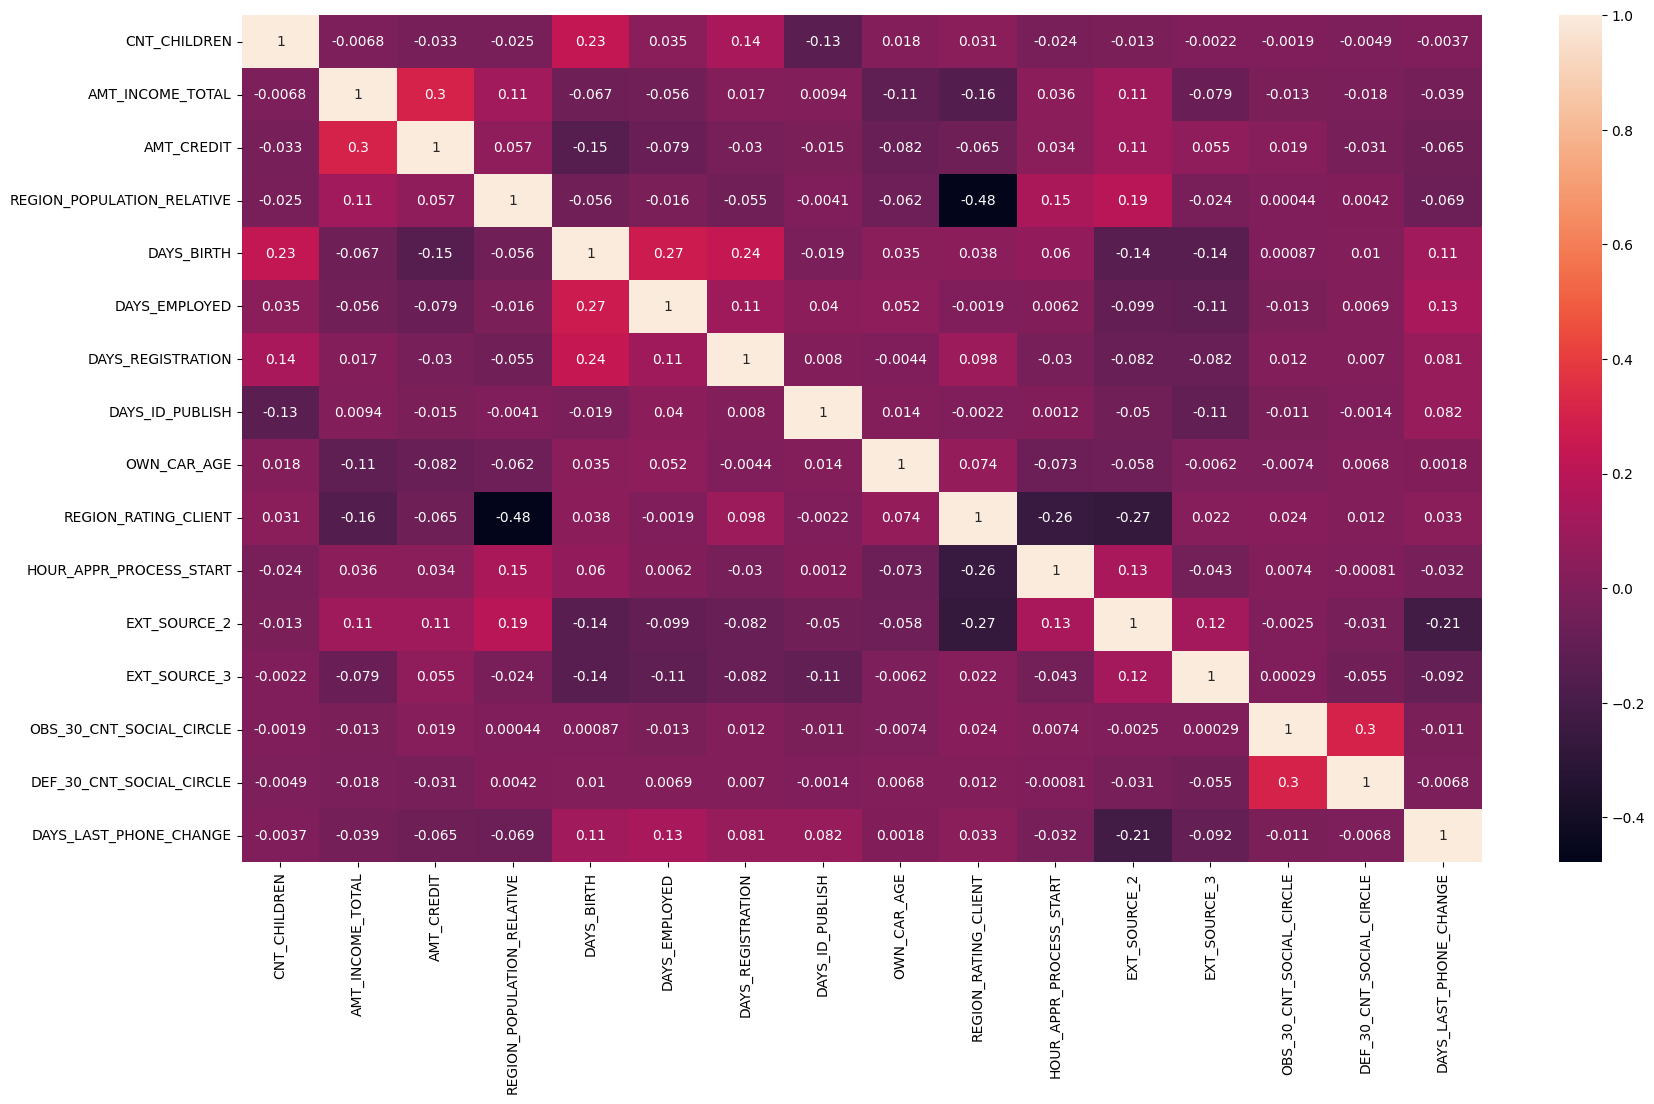

In [41]:
# 52 continous variables
continuous_df = df_filtered_forsc[cont_var_df]
corr_df = continuous_df.corr()

plt.subplots(figsize=(20,11))
sns.heatmap(corr_df, annot=True)
# 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

In [42]:
df_filtered_forsc['STATUS'].value_counts()

0    16632
1     1651
Name: STATUS, dtype: int64

In [43]:
df_filtered_forsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18283 entries, 13 to 307494
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATUS                      18283 non-null  int64  
 1   NAME_CONTRACT_TYPE          18283 non-null  object 
 2   FLAG_OWN_CAR                18283 non-null  object 
 3   FLAG_OWN_REALTY             18283 non-null  object 
 4   CNT_CHILDREN                18283 non-null  int64  
 5   AMT_INCOME_TOTAL            18283 non-null  float64
 6   AMT_CREDIT                  18283 non-null  float64
 7   NAME_TYPE_SUITE             18283 non-null  object 
 8   NAME_INCOME_TYPE            18283 non-null  object 
 9   NAME_EDUCATION_TYPE         18283 non-null  object 
 10  NAME_FAMILY_STATUS          18283 non-null  object 
 11  NAME_HOUSING_TYPE           18283 non-null  object 
 12  REGION_POPULATION_RELATIVE  18283 non-null  float64
 13  DAYS_BIRTH                  1

**Generate WOE bins**

Woebin() generate groupings as a python dictionary object and also provides a method to plot WOE for the bins.  It will optimize for IV, but will not attempt to make the trend monotonic.

In [44]:
df_filtered_forsc.drop(columns='ORGANIZATION_TYPE', inplace=True)

In [45]:
df_filtered_forsc.shape

(18283, 55)

In [46]:
# automatically calculate bin ranges 
bins = sc.woebin(df_filtered_forsc, 'STATUS')

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)
    
# look at less that -0.1 as bad predictive

[INFO] creating woe binning ...
Binning on 18283 rows and 52 columns in 00:00:18
DAYS_REGISTRATION  : 


variable                bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv   breaks  is_special_values
0  DAYS_REGISTRATION     [-inf,-8500.0)   2233     0.122135  2086  147  0.065831 -0.342624  0.012466  0.025848  -8500.0              False
1  DAYS_REGISTRATION  [-8500.0,-7000.0)   1869     0.102226  1725  144  0.077047 -0.173222  0.002857  0.025848  -7000.0              False
2  DAYS_REGISTRATION  [-7000.0,-1500.0)  10195     0.557622  9270  925  0.090731  0.005202  0.000015  0.025848  -1500.0              False
3  DAYS_REGISTRATION      [-1500.0,inf)   3986     0.218017  3551  435  0.109132  0.210309  0.010510  0.025848      inf              False

----------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY  : 


variable         bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  REG_CITY_NOT_LIVE_CITY  [-inf,1.0)  16718     0.914401  15252  1466  0.087690 -0.032226  0.000937  0.009675    1.0              False
1  REG_CITY_NOT_LIVE_CITY   [1.0,inf)   1565     0.085599   1380   185  0.118211  0.300464  0.008738  0.009675    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_21  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_21  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_3  : 


variable         bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_3  [-inf,1.0)   5928     0.324236   5472   456  0.076923 -0.174959  0.009239   0.01324    1.0              False
1  FLAG_DOCUMENT_3   [1.0,inf)  12355     0.675764  11160  1195  0.096722  0.075758  0.004001   0.01324    inf              False

----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


variable                   bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv     breaks  is_special_values
0  AMT_CREDIT       [-inf,250000.0)   2717     0.148608  2508  209  0.076923 -0.174959  0.004235  0.058391   250000.0              False
1  AMT_CREDIT   [250000.0,650000.0)   7825     0.427993  6962  863  0.110288  0.222140  0.023130  0.058391   650000.0              False
2  AMT_CREDIT   [650000.0,700000.0)    943     0.051578   860   83  0.088017 -0.028144  0.000040  0.058391   700000.0              False
3  AMT_CREDIT  [700000.0,1350000.0)   5804     0.317453  5352  452  0.077877 -0.161596  0.007759  0.058391  1350000.0              False
4  AMT_CREDIT       [1350000.0,inf)    994     0.054367   950   44  0.044266 -0.762325  0.023227  0.058391        inf              False

----------------------------------------------------------------------------------------------------
FLAG_PHONE  : 


variable         bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  FLAG_PHONE  [-inf,1.0)  13514     0.739157  12261  1253  0.092719  0.029065  0.000632  0.002509    1.0              False
1  FLAG_PHONE   [1.0,inf)   4769     0.260843   4371   398  0.083456 -0.086348  0.001877  0.002509    inf              False

----------------------------------------------------------------------------------------------------
DAYS_BIRTH  : 


variable                  bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv    breaks  is_special_values
0  DAYS_BIRTH      [-inf,-17500.0)   4311     0.235793  3985  326  0.075621 -0.193448  0.008152  0.022432  -17500.0              False
1  DAYS_BIRTH  [-17500.0,-12000.0)   9636     0.527047  8788  848  0.088003 -0.028314  0.000418  0.022432  -12000.0              False
2  DAYS_BIRTH  [-12000.0,-10000.0)   3154     0.172510  2821  333  0.105580  0.173243  0.005558  0.022432  -10000.0              False
3  DAYS_BIRTH       [-10000.0,inf)   1182     0.064650  1038  144  0.121827  0.334710  0.008304  0.022432       inf              False

----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE  : 


variable                bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv   breaks  is_special_values
0  DAYS_LAST_PHONE_CHANGE     [-inf,-2000.0)   2593     0.141826  2435  158  0.060933 -0.425160  0.021558  0.035134  -2000.0              False
1  DAYS_LAST_PHONE_CHANGE  [-2000.0,-1500.0)   3135     0.171471  2889  246  0.078469 -0.153387  0.003789  0.035134  -1500.0              False
2  DAYS_LAST_PHONE_CHANGE   [-1500.0,-800.0)   3806     0.208172  3454  352  0.092486  0.026290  0.000145  0.035134   -800.0              False
3  DAYS_LAST_PHONE_CHANGE       [-800.0,inf)   8749     0.478532  7854  895  0.102297  0.137993  0.009642  0.035134      inf              False

----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


variable          bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  REGION_POPULATION_RELATIVE  [-inf,0.01)   4438     0.242739  3984  454  0.102298  0.138003  0.004892  0.030848   0.01              False
1  REGION_POPULATION_RELATIVE  [0.01,0.03)   9625     0.526445  8732  893  0.092779  0.029784  0.000473  0.030848   0.03              False
2  REGION_POPULATION_RELATIVE  [0.03,0.04)   3198     0.174917  2940  258  0.080675 -0.123258  0.002527  0.030848   0.04              False
3  REGION_POPULATION_RELATIVE   [0.04,inf)   1022     0.055899   976   46  0.045010 -0.744874  0.022957  0.030848    inf              False

----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


variable                                                bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv                                             breaks  is_special_values
0  NAME_EDUCATION_TYPE                 Academic degree%,%Higher education   3093     0.169174   2888   205  0.066279 -0.335362  0.016592  0.019468                 Academic degree%,%Higher education              False
1  NAME_EDUCATION_TYPE  Incomplete higher%,%Secondary / secondary spec...  15190     0.830826  13744  1446  0.095194  0.058146  0.002877  0.019468  Incomplete higher%,%Secondary / secondary spec...              False

----------------------------------------------------------------------------------------------------
FLAG_EMAIL  : 


variable         bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  FLAG_EMAIL  [-inf,1.0)  17201     0.940819  15655  1546  0.089878 -0.005172  0.000025  0.000411    1.0              False
1  FLAG_EMAIL   [1.0,inf)   1082     0.059181    977   105  0.097043  0.079421  0.000386  0.000411    inf              False

----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


variable                bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv   breaks  is_special_values
0  DAYS_EMPLOYED     [-inf,-4600.0)   1538     0.084122  1457   81  0.052666 -0.579738  0.022344  0.072307  -4600.0              False
1  DAYS_EMPLOYED  [-4600.0,-1600.0)   7505     0.410491  6956  549  0.073151 -0.229314  0.019653  0.072307  -1600.0              False
2  DAYS_EMPLOYED  [-1600.0,-1000.0)   3309     0.180988  2972  337  0.101843  0.133040  0.003383  0.072307  -1000.0              False
3  DAYS_EMPLOYED      [-1000.0,inf)   5931     0.324400  5247  684  0.115326  0.272494  0.026927  0.072307      inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_5  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_5  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


variable                        bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv               breaks  is_special_values
0  EXT_SOURCE_3                 [-inf,0.2)   1480     0.080950  1156  324  0.218919  1.037970  0.131552  0.321211                  0.2              False
1  EXT_SOURCE_3  [0.2,0.30000000000000004)   1743     0.095334  1467  276  0.158348  0.639373  0.050490  0.321211  0.30000000000000004              False
2  EXT_SOURCE_3  [0.30000000000000004,0.4)   2385     0.130449  2119  266  0.111530  0.234744  0.007913  0.321211                  0.4              False
3  EXT_SOURCE_3   [0.4,0.6000000000000001)   5776     0.315922  5331  445  0.077043 -0.173272  0.008836  0.321211   0.6000000000000001              False
4  EXT_SOURCE_3   [0.6000000000000001,inf)   6899     0.377345  6559  340  0.049283 -0.649700  0.122419  0.321211                  inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_13  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_13  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_16  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_16  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
REG_REGION_NOT_WORK_REGION  : 


variable         bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  REG_REGION_NOT_WORK_REGION  [-inf,1.0)  17343     0.948586  15770  1573  0.090699  0.004823  0.000022  0.000447    1.0              False
1  REG_REGION_NOT_WORK_REGION   [1.0,inf)    940     0.051414    862    78  0.082979 -0.092599  0.000424  0.000447    inf              False

----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE  : 


variable         bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  OBS_30_CNT_SOCIAL_CIRCLE  [-inf,1.0)   9410     0.514686  8582  828  0.087991 -0.028462  0.000412  0.001493    1.0              False
1  OBS_30_CNT_SOCIAL_CIRCLE   [1.0,3.0)   4750     0.259804  4319  431  0.090737  0.005276  0.000007  0.001493    3.0              False
2  OBS_30_CNT_SOCIAL_CIRCLE   [3.0,4.0)   1304     0.071323  1179  125  0.095859  0.065839  0.000318  0.001493    4.0              False
3  OBS_30_CNT_SOCIAL_CIRCLE   [4.0,6.0)   1525     0.083411  1386  139  0.091148  0.010244  0.000009  0.001493    6.0              False
4  OBS_30_CNT_SOCIAL_CIRCLE   [6.0,inf)   1294     0.070776  1166  128  0.098918  0.100643  0.000747  0.001493    inf              False

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


variable         bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  REGION_RATING_CLIENT  [-inf,2.0)   1516     0.082919   1436    80  0.052770 -0.577643  0.021883  0.047966    2.0              False
1  REGION_RATING_CLIENT   [2.0,3.0)  14025     0.767106  12801  1224  0.087273 -0.037452  0.001060  0.047966    3.0              False
2  REGION_RATING_CLIENT   [3.0,inf)   2742     0.149975   2395   347  0.126550  0.378134  0.025023  0.047966    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_4  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_4  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
REG_REGION_NOT_LIVE_REGION  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  REG_REGION_NOT_LIVE_REGION  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
FLAG_EMP_PHONE  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_EMP_PHONE  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


variable                                                bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv                                             breaks  is_special_values
0  NAME_TYPE_SUITE                                  Children%,%Family   2505     0.137013   2294   211  0.084232 -0.076247  0.000772  0.001791                                  Children%,%Family              False
1  NAME_TYPE_SUITE                                      Unaccompanied  14734     0.805885  13400  1334  0.090539  0.002875  0.000007  0.001791                                      Unaccompanied              False
2  NAME_TYPE_SUITE  Spouse, partner%,%Other_A%,%Other_B%,%Group of...   1044     0.057102    938   106  0.101533  0.129637  0.001012  0.001791  Spouse, partner%,%Other_A%,%Other_B%,%Group of...              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_9  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_9  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


variable                bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv   breaks  is_special_values
0  DAYS_ID_PUBLISH     [-inf,-4200.0)   4846     0.265055  4483  363  0.074907 -0.203698  0.010118  0.023282  -4200.0              False
1  DAYS_ID_PUBLISH  [-4200.0,-3600.0)   2592     0.141771  2352  240  0.092593  0.027565  0.000109  0.023282  -3600.0              False
2  DAYS_ID_PUBLISH  [-3600.0,-3000.0)   2097     0.114697  1927  170  0.081068 -0.117974  0.001521  0.023282  -3000.0              False
3  DAYS_ID_PUBLISH  [-3000.0,-2700.0)    976     0.053383   863  113  0.115779  0.276921  0.004585  0.023282  -2700.0              False
4  DAYS_ID_PUBLISH  [-2700.0,-1200.0)   4540     0.248318  4121  419  0.092291  0.023967  0.000144  0.023282  -1200.0              False
5  DAYS_ID_PUBLISH      [-1200.0,inf)   3232     0.176776  2886  346  0.107054  0.188759  0.006805  0.023282      inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_11  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_11  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


variable                       bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv              breaks  is_special_values
0  EXT_SOURCE_2                [-inf,0.2)   1471     0.080457  1150  321  0.218219  1.033871  0.129527   0.27249                 0.2              False
1  EXT_SOURCE_2                 [0.2,0.4)   2837     0.155171  2458  379  0.133592  0.440380  0.036010   0.27249                 0.4              False
2  EXT_SOURCE_2                 [0.4,0.5)   2225     0.121698  2019  206  0.092584  0.027466  0.000093   0.27249                 0.5              False
3  EXT_SOURCE_2  [0.5,0.7000000000000001)   9163     0.501176  8524  639  0.069737 -0.280789  0.035230   0.27249  0.7000000000000001              False
4  EXT_SOURCE_2  [0.7000000000000001,inf)   2587     0.141498  2481  106  0.040974 -0.843031  0.071630   0.27249                 inf              False

----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


variable                                                bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv                                             breaks  is_special_values
0  NAME_HOUSING_TYPE  Office apartment%,%Co-op apartment%,%Municipal...  16984      0.92895  15494  1490  0.087730 -0.031729  0.000923  0.011232  Office apartment%,%Co-op apartment%,%Municipal...              False
1  NAME_HOUSING_TYPE                    Rented apartment%,%With parents   1299      0.07105   1138   161  0.123941  0.354324  0.010309  0.011232                    Rented apartment%,%With parents              False

----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


variable                                                bin  count  count_distr  good   bad   badprob       woe    bin_iv  total_iv                                             breaks  is_special_values
0  OCCUPATION_TYPE  HR staff%,%Medicine staff%,%IT staff%,%Private...   1444     0.078980  1359    85  0.058864 -0.461906  0.013962  0.030173  HR staff%,%Medicine staff%,%IT staff%,%Private...              False
1  OCCUPATION_TYPE             Managers%,%Sales staff%,%Realty agents   4239     0.231855  3920   319  0.075254 -0.198708  0.008440  0.030173             Managers%,%Sales staff%,%Realty agents              False
2  OCCUPATION_TYPE                                           Laborers   1833     0.100257  1661   172  0.093835  0.042267  0.000182  0.030173                                           Laborers              False
3  OCCUPATION_TYPE  Drivers%,%High skill tech staff%,%Cooking staf...  10767     0.588908  9692  1075  0.099842  0.110967  0.007589  0.030173  Drivers%,%High skill tech staff%,%Cooking staf...              False

----------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY  : 


variable         bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  REG_CITY_NOT_WORK_CITY  [-inf,1.0)  12803     0.700268  11668  1135  0.088651 -0.020270  0.000285  0.000934    1.0              False
1  REG_CITY_NOT_WORK_CITY   [1.0,inf)   5480     0.299732   4964   516  0.094161  0.046087  0.000649  0.000934    inf              False

----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


variable                                                bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv                                             breaks  is_special_values
0  NAME_INCOME_TYPE  Businessman%,%Student%,%State servant%,%Commer...   5824     0.318547   5356   468  0.080357 -0.127557  0.004919  0.007053  Businessman%,%Student%,%State servant%,%Commer...              False
1  NAME_INCOME_TYPE                                            Working  12459     0.681453  11276  1183  0.094951  0.055324  0.002134  0.007053                                            Working              False

----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START  : 


variable          bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  HOUR_APPR_PROCESS_START   [-inf,9.0)   2090     0.114314  1848  242  0.115789  0.277026  0.009825   0.01418    9.0              False
1  HOUR_APPR_PROCESS_START   [9.0,11.0)   3913     0.214024  3549  364  0.093023  0.032680  0.000232   0.01418   11.0              False
2  HOUR_APPR_PROCESS_START  [11.0,16.0)   9302     0.508779  8492  810  0.087078 -0.039898  0.000797   0.01418   16.0              False
3  HOUR_APPR_PROCESS_START   [16.0,inf)   2978     0.162884  2743  235  0.078912 -0.147275  0.003326   0.01418    inf              False

----------------------------------------------------------------------------------------------------
OWN_CAR_AGE  : 


variable         bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  OWN_CAR_AGE  [-inf,6.0)   4521     0.247279  4210  311  0.068790 -0.295478  0.019134  0.037912    6.0              False
1  OWN_CAR_AGE  [6.0,10.0)   4301     0.235246  3954  347  0.080679 -0.123211  0.003396  0.037912   10.0              False
2  OWN_CAR_AGE  [10.0,inf)   9461     0.517475  8468  993  0.104957  0.166628  0.015382  0.037912    inf              False

----------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE  : 


variable         bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  FLAG_WORK_PHONE  [-inf,1.0)  14053     0.768638  12812  1241  0.088309 -0.024517  0.000457  0.001914    1.0              False
1  FLAG_WORK_PHONE   [1.0,inf)   4230     0.231362   3820   410  0.096927  0.078099  0.001457  0.001914    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_6  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_6  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


variable         bin  count  count_distr   good  bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  CNT_CHILDREN  [-inf,1.0)  10992     0.601214  10019  973  0.088519 -0.021907  0.000286  0.003783    1.0              False
1  CNT_CHILDREN   [1.0,2.0)   4640     0.253788   4183  457  0.098491  0.095847  0.002425  0.003783    2.0              False
2  CNT_CHILDREN   [2.0,inf)   2651     0.144998   2430  221  0.083365 -0.087536  0.001072  0.003783    inf              False

----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START  : 


variable                          bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv                       breaks  is_special_values
0  WEEKDAY_APPR_PROCESS_START            SUNDAY%,%SATURDAY   2867     0.156812  2634  233  0.081270 -0.115273  0.001988  0.004105            SUNDAY%,%SATURDAY              False
1  WEEKDAY_APPR_PROCESS_START  MONDAY%,%TUESDAY%,%THURSDAY   9326     0.510091  8490  836  0.089642 -0.008068  0.000033  0.004105  MONDAY%,%TUESDAY%,%THURSDAY              False
2  WEEKDAY_APPR_PROCESS_START                    WEDNESDAY   3174     0.173604  2883  291  0.091682  0.016684  0.000049  0.004105                    WEDNESDAY              False
3  WEEKDAY_APPR_PROCESS_START                       FRIDAY   2916     0.159492  2625  291  0.099794  0.110434  0.002035  0.004105                       FRIDAY              False

----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


variable bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  FLAG_OWN_REALTY   N   5918     0.323689   5425   493  0.083305 -0.088317  0.002435  0.003541      N              False
1  FLAG_OWN_REALTY   Y  12365     0.676311  11207  1158  0.093651  0.040103  0.001106  0.003541      Y              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_8  : 


variable         bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_8  [-inf,1.0)  14260      0.77996  12941  1319  0.092496  0.026421  0.000550  0.002604    1.0              False
1  FLAG_DOCUMENT_8   [1.0,inf)   4023      0.22004   3691   332  0.082525 -0.098570  0.002053  0.002604    inf              False

----------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE  : 


variable         bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  DEF_30_CNT_SOCIAL_CIRCLE  [-inf,1.0)  16215     0.886889  14815  1400  0.086340 -0.049221  0.002106  0.016243    1.0              False
1  DEF_30_CNT_SOCIAL_CIRCLE   [1.0,inf)   2068     0.113111   1817   251  0.121373  0.330458  0.014138  0.016243    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_14  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_14  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


variable                               bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv                            breaks  is_special_values
0  NAME_FAMILY_STATUS                           Married  13844     0.757206  12659  1185  0.085597 -0.058678  0.002545   0.00993                           Married              False
1  NAME_FAMILY_STATUS  Separated%,%Single / not married   2647     0.144779   2374   273  0.103136  0.147088  0.003327   0.00993  Separated%,%Single / not married              False
2  NAME_FAMILY_STATUS            Widow%,%Civil marriage   1792     0.098015   1599   193  0.107701  0.195504  0.004058   0.00993            Widow%,%Civil marriage              False

----------------------------------------------------------------------------------------------------
FLAG_CONT_MOBILE  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_CONT_MOBILE  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_15  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_15  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_20  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_20  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


variable              bin  count  count_distr   good   bad   badprob       woe    bin_iv  total_iv           breaks  is_special_values
0  NAME_CONTRACT_TYPE  Revolving loans   1560     0.085325   1457   103  0.066026 -0.339458  0.008560  0.009247  Revolving loans              False
1  NAME_CONTRACT_TYPE       Cash loans  16723     0.914675  15175  1548  0.092567  0.027262  0.000687  0.009247       Cash loans              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_7  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_7  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_19  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_19  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


variable                  bin  count  count_distr  good   bad   badprob       woe    bin_iv  total_iv    breaks  is_special_values
0  AMT_INCOME_TOTAL      [-inf,200000.0)  10856     0.593776  9783  1073  0.098839  0.099760  0.006156  0.019458  200000.0              False
1  AMT_INCOME_TOTAL  [200000.0,260000.0)   4031     0.220478  3706   325  0.080625 -0.123936  0.003219  0.019458  260000.0              False
2  AMT_INCOME_TOTAL  [260000.0,280000.0)   1117     0.061095  1020    97  0.086840 -0.042900  0.000110  0.019458  280000.0              False
3  AMT_INCOME_TOTAL       [280000.0,inf)   2279     0.124651  2123   156  0.068451 -0.300782  0.009973  0.019458       inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_18  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_18  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_17  : 


variable         bin  count  count_distr   good   bad   badprob  woe  bin_iv  total_iv breaks  is_special_values
0  FLAG_DOCUMENT_17  [-inf,inf)  18283          1.0  16632  1651  0.090302  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------


In [ ]:
# df_filtered_forsc.drop(columns='FLAG_DOCUMENT_21', inplace=True)

{'DAYS_REGISTRATION': <Figure size 640x480 with 2 Axes>,
 'REG_CITY_NOT_LIVE_CITY': <Figure size 640x480 with 2 Axes>,
 'FLAG_DOCUMENT_21': <Figure size 640x480 with 2 Axes>,
 'FLAG_DOCUMENT_3': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT': <Figure size 640x480 with 2 Axes>,
 'FLAG_PHONE': <Figure size 640x480 with 2 Axes>,
 'DAYS_BIRTH': <Figure size 640x480 with 2 Axes>,
 'DAYS_LAST_PHONE_CHANGE': <Figure size 640x480 with 2 Axes>,
 'REGION_POPULATION_RELATIVE': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'FLAG_EMAIL': <Figure size 640x480 with 2 Axes>,
 'DAYS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'FLAG_DOCUMENT_5': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_3': <Figure size 640x480 with 2 Axes>,
 'FLAG_DOCUMENT_13': <Figure size 640x480 with 2 Axes>,
 'FLAG_DOCUMENT_16': <Figure size 640x480 with 2 Axes>,
 'REG_REGION_NOT_WORK_REGION': <Figure size 640x480 with 2 Axes>,
 'OBS_30_CNT_SOCIAL_CIRCLE': <Figure size 640

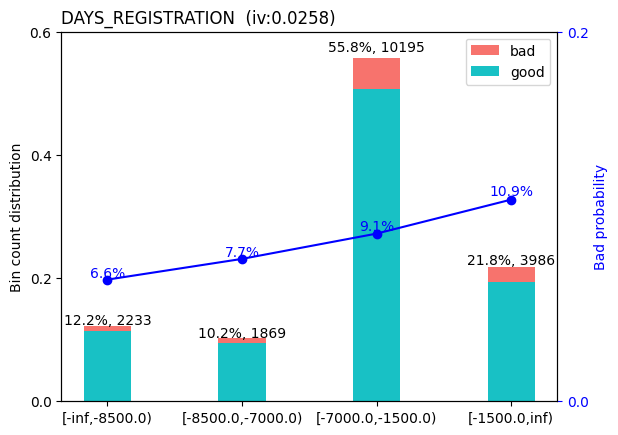

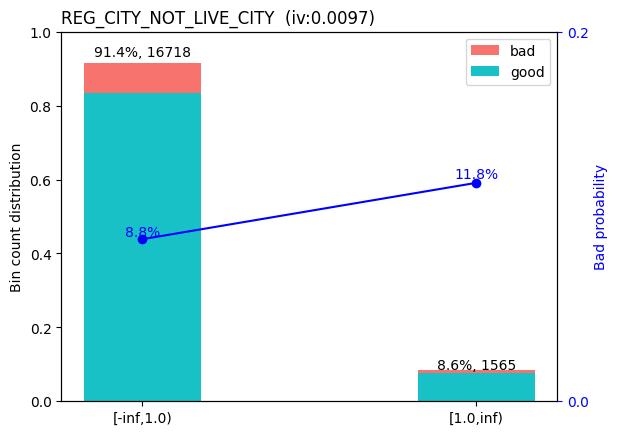

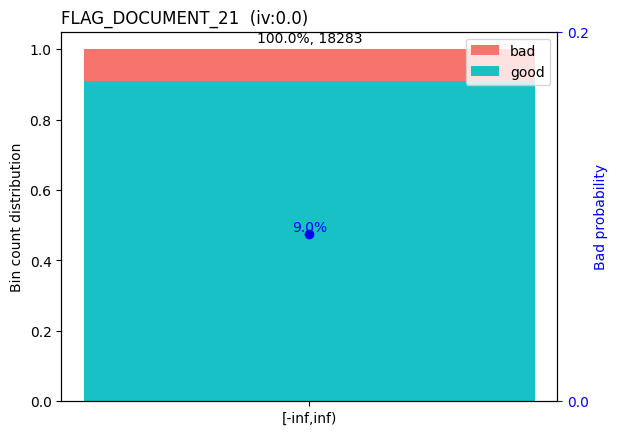

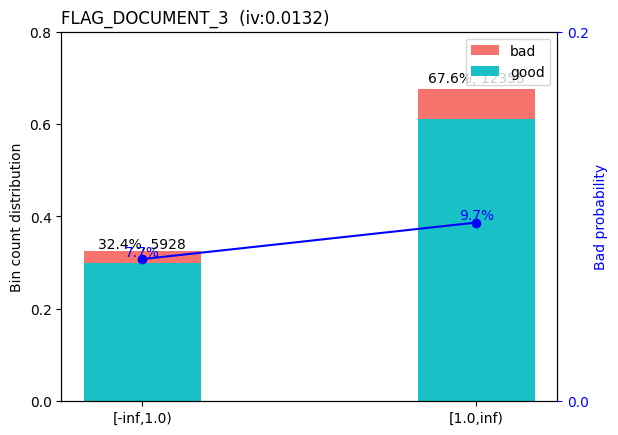

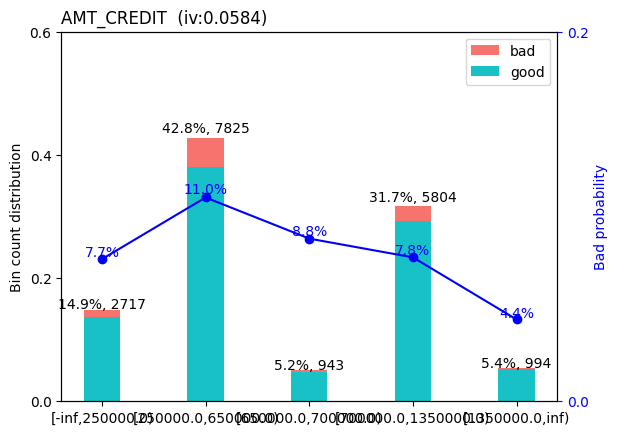

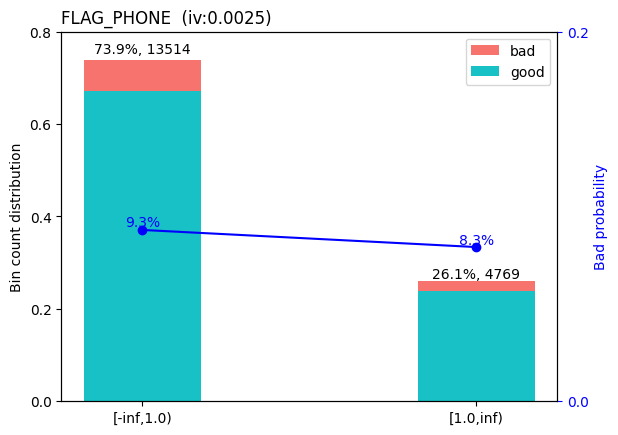

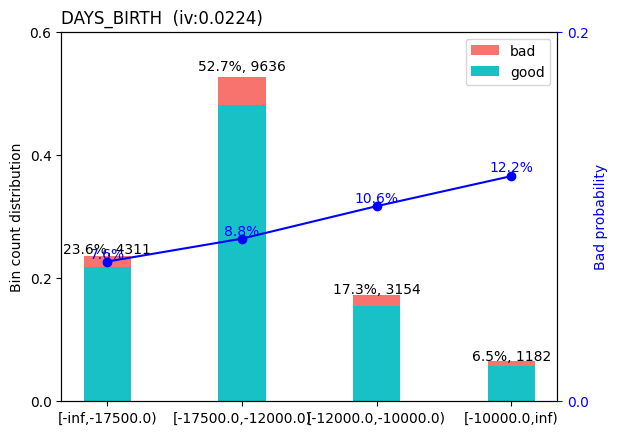

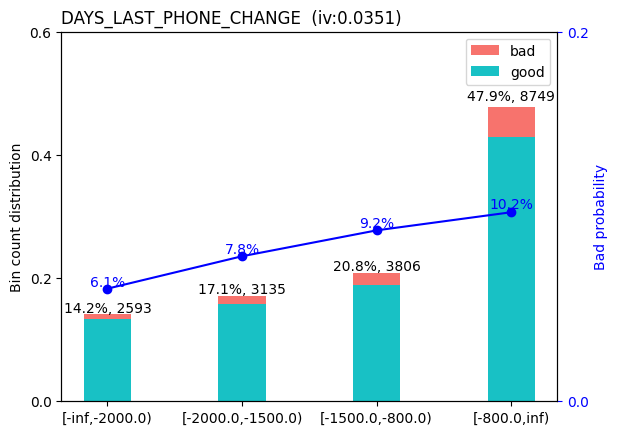

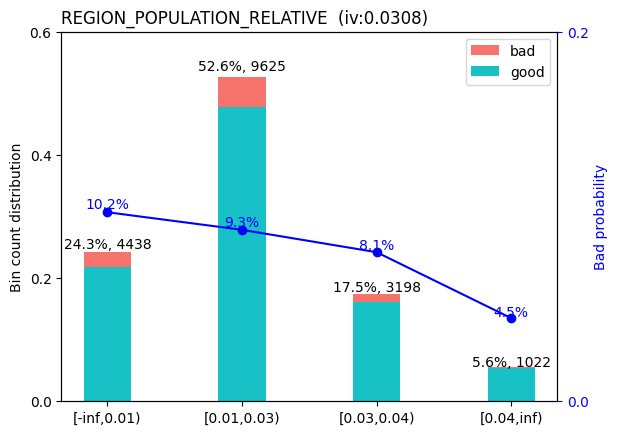

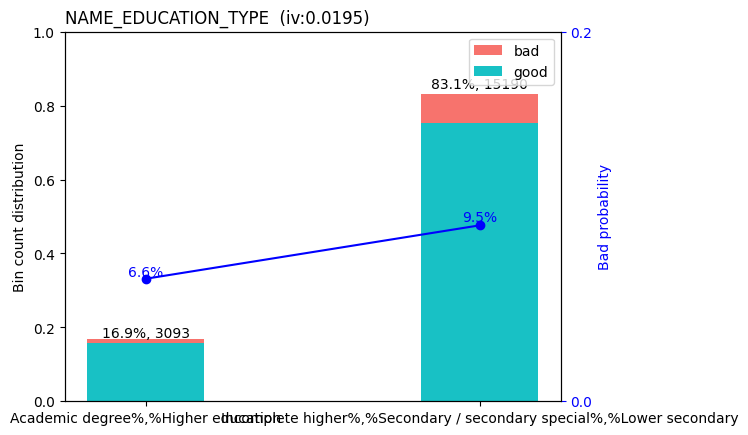

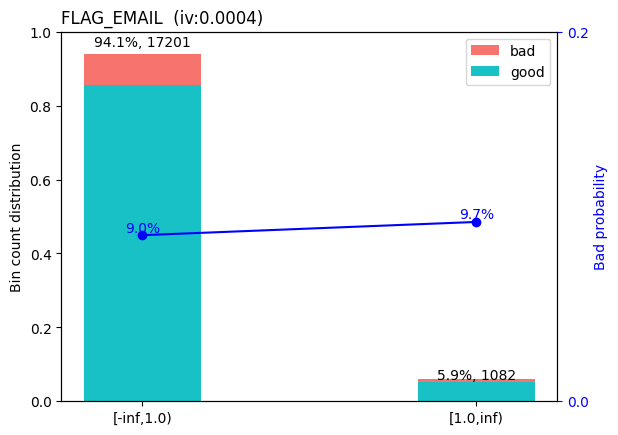

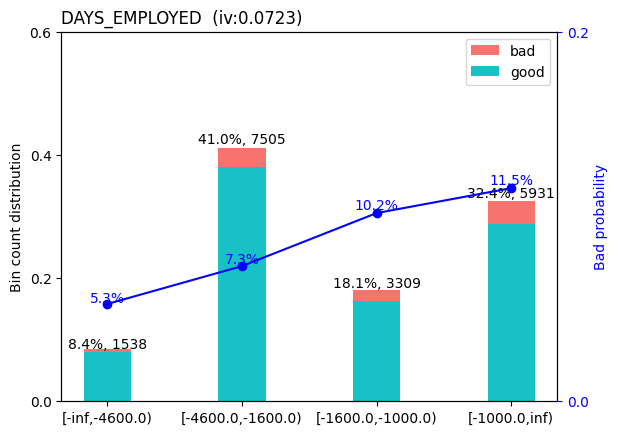

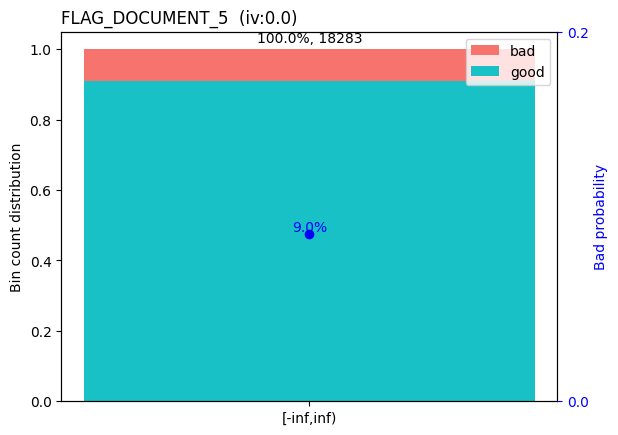

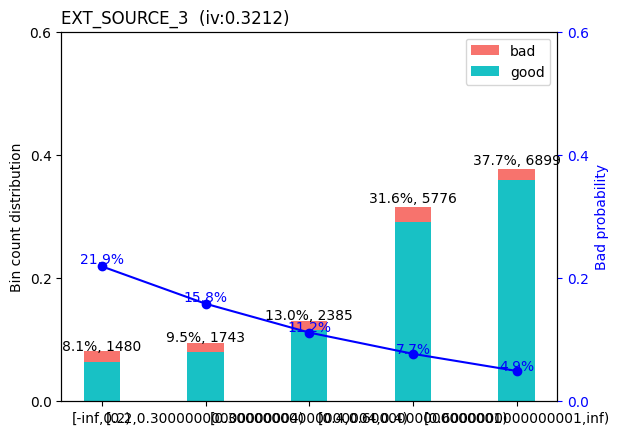

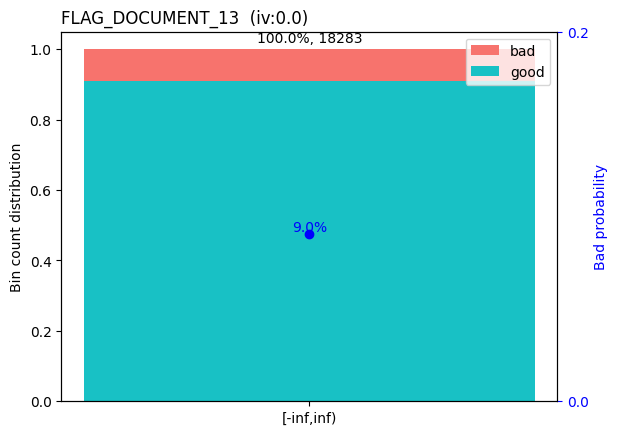

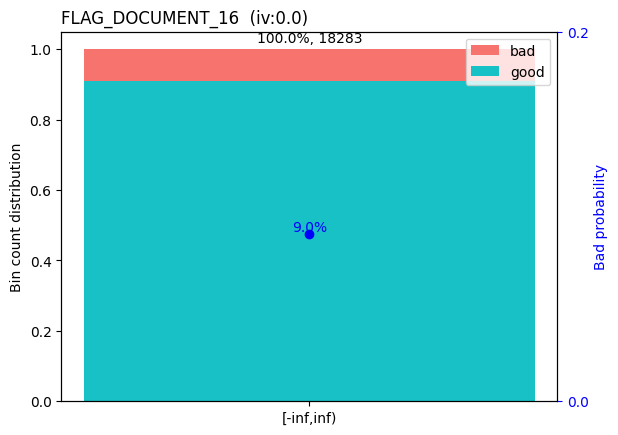

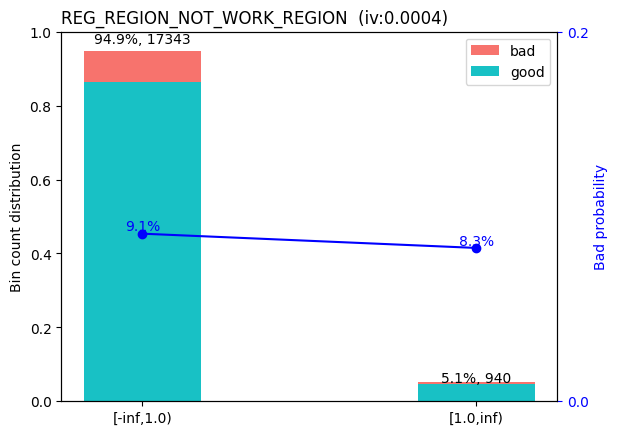

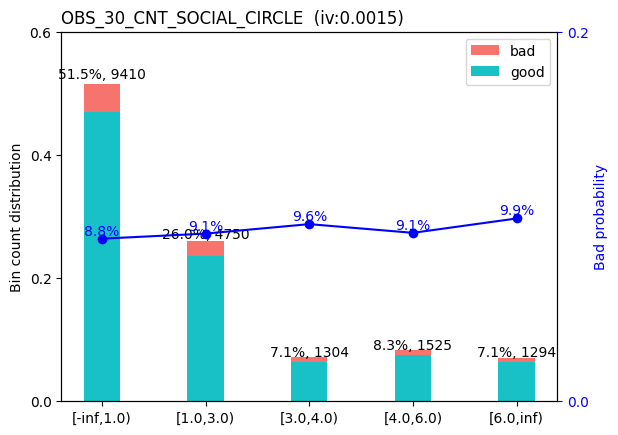

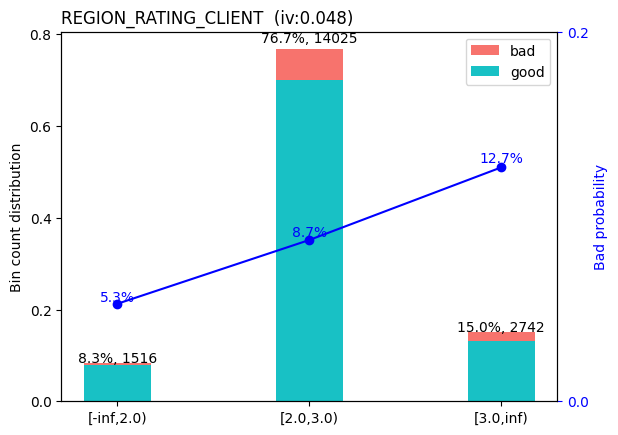

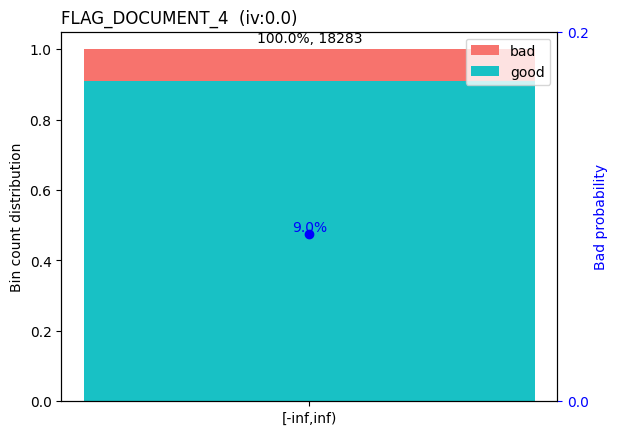

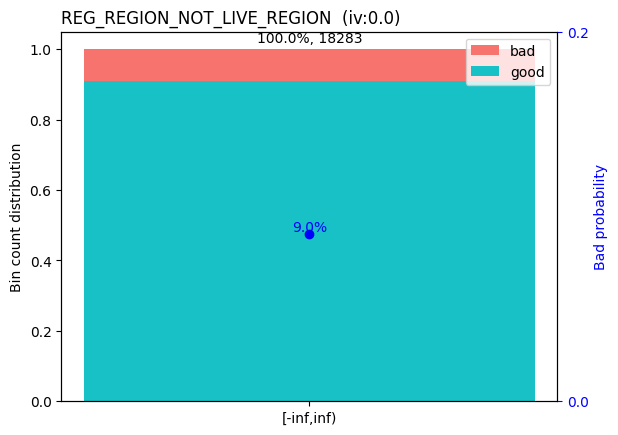

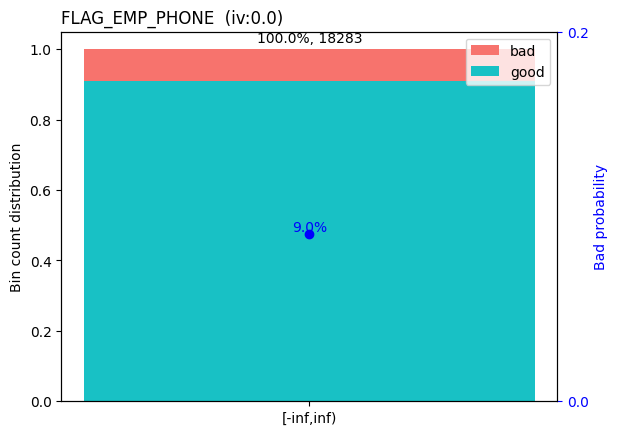

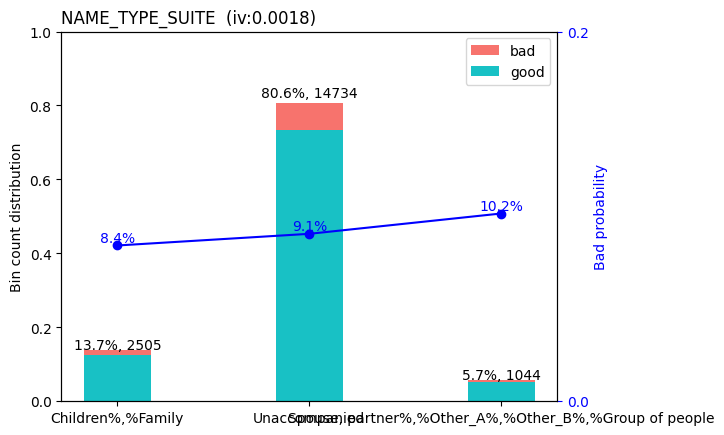

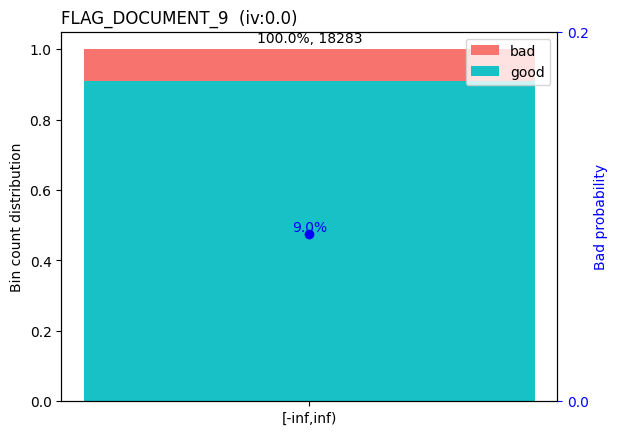

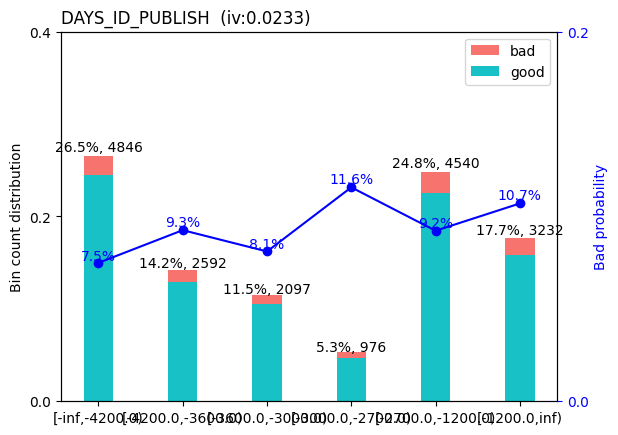

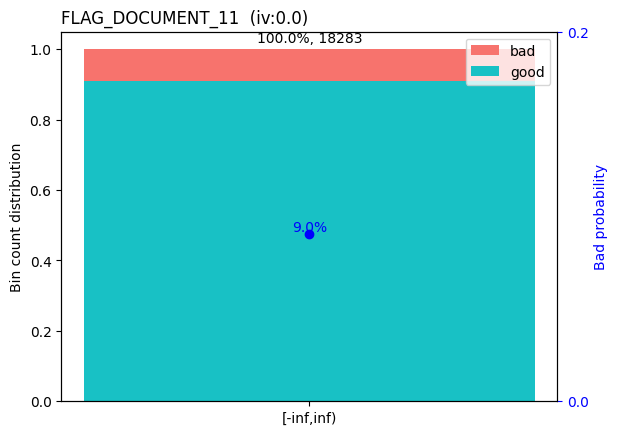

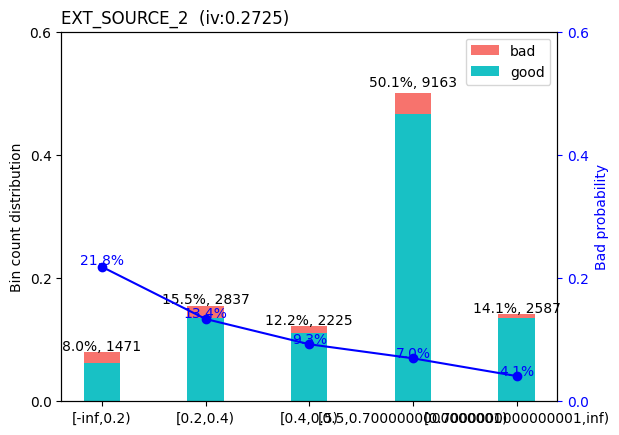

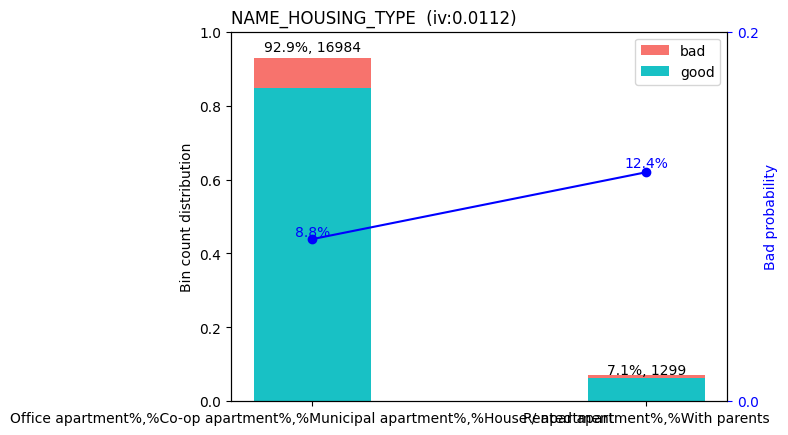

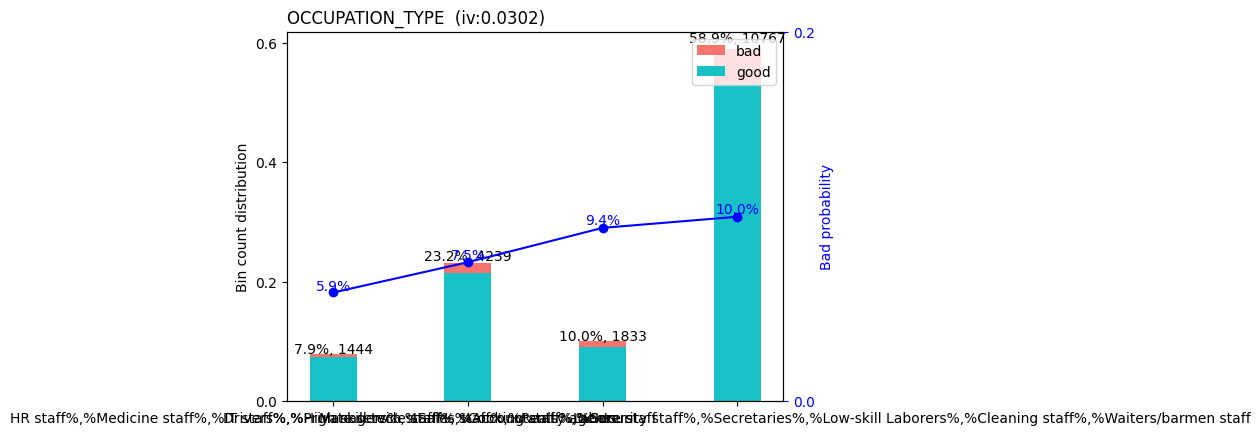

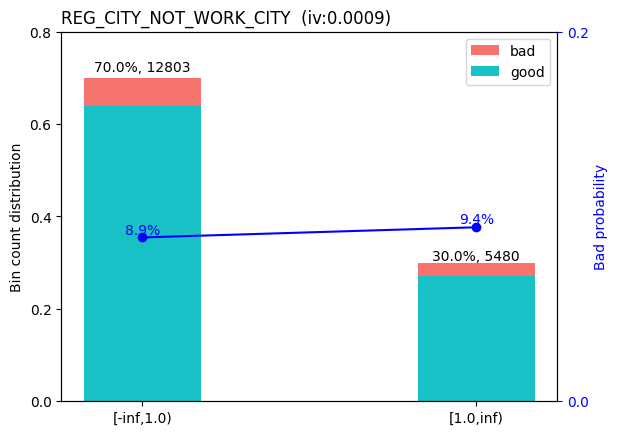

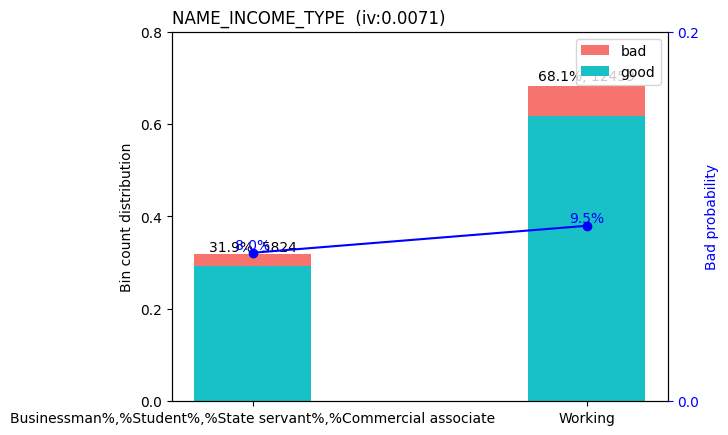

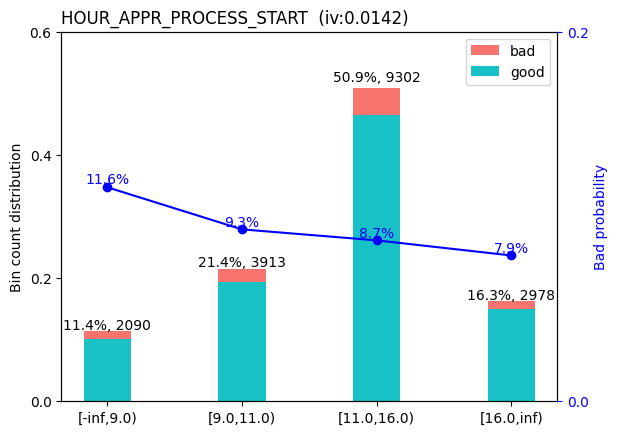

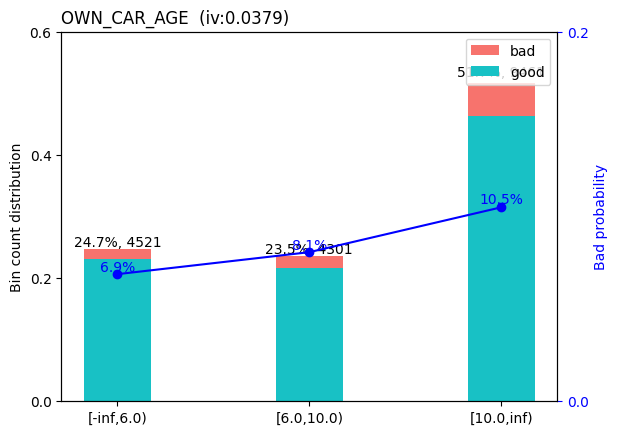

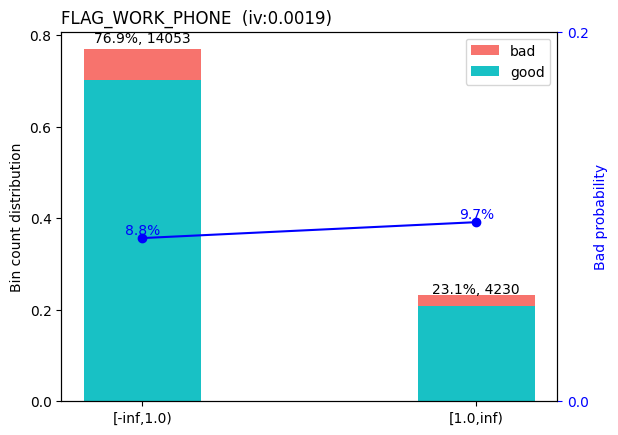

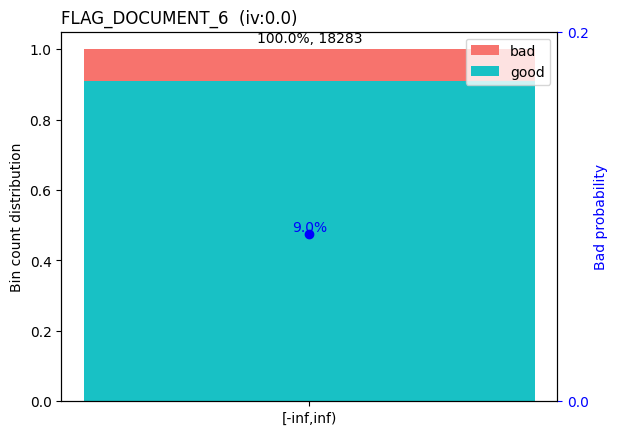

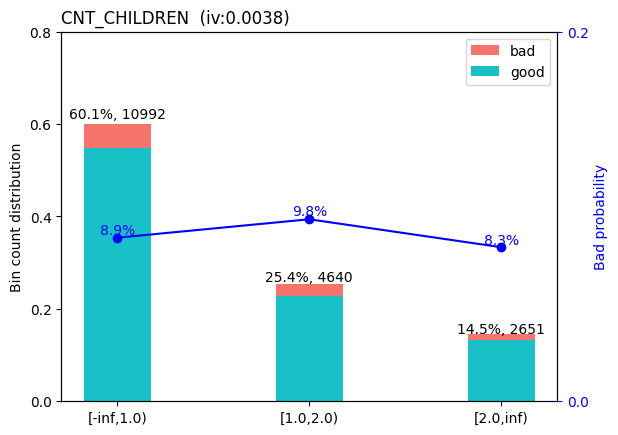

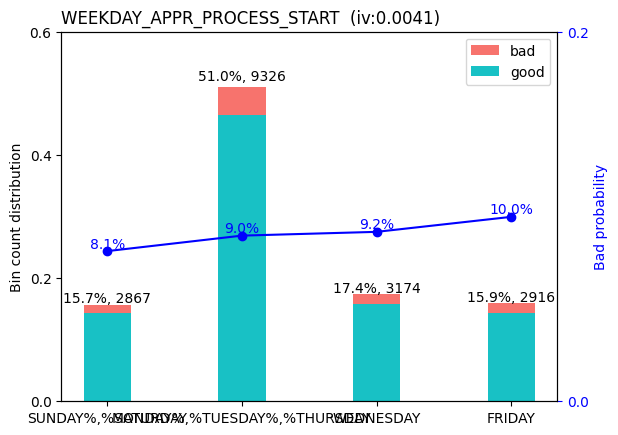

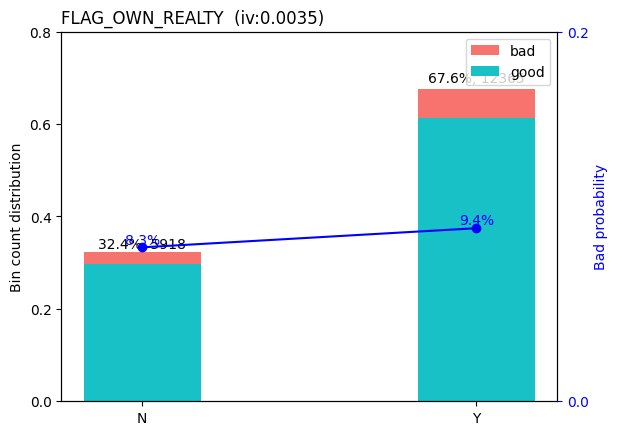

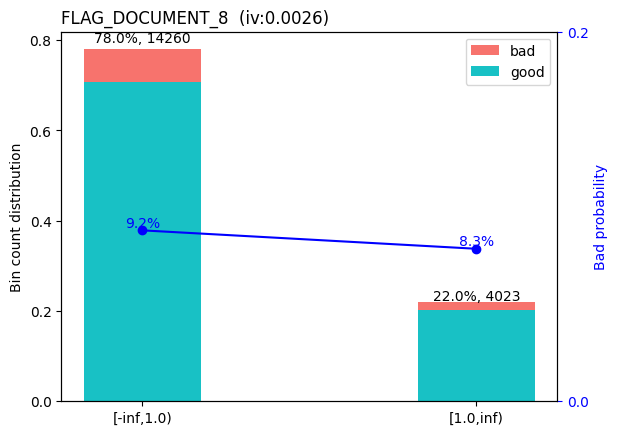

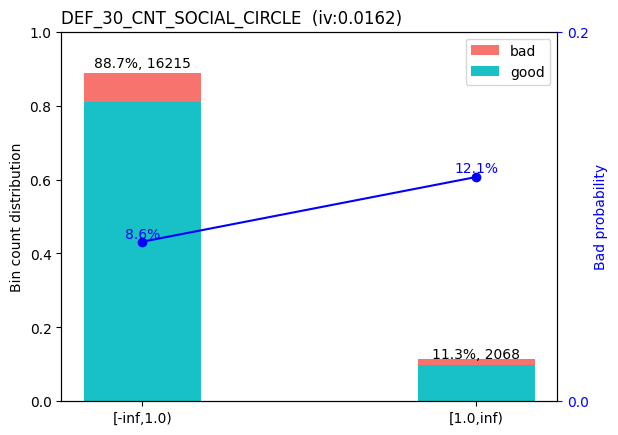

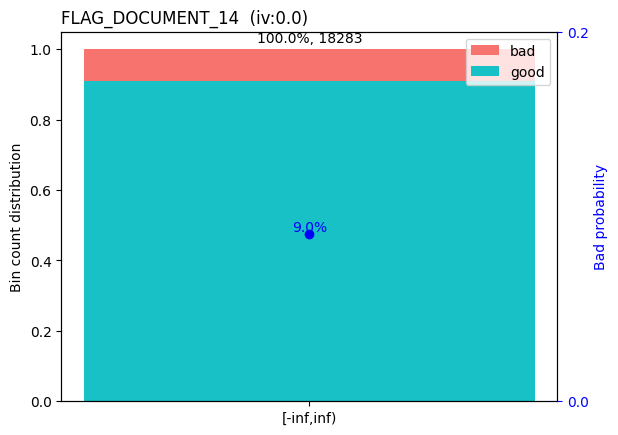

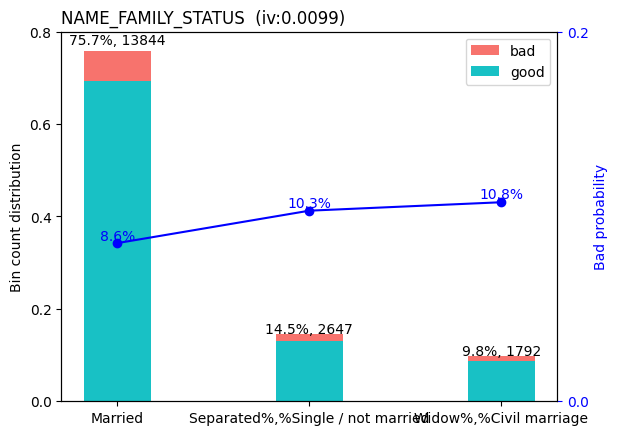

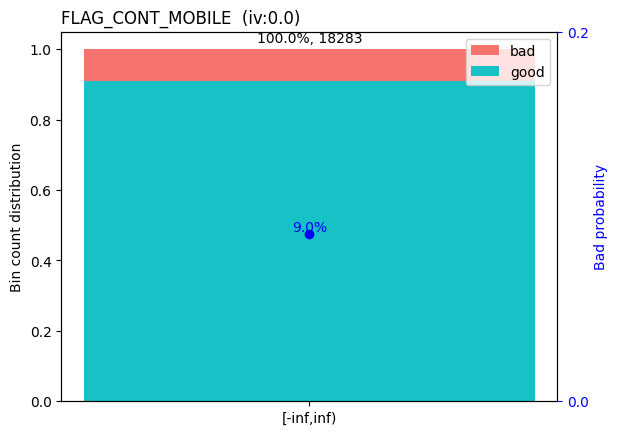

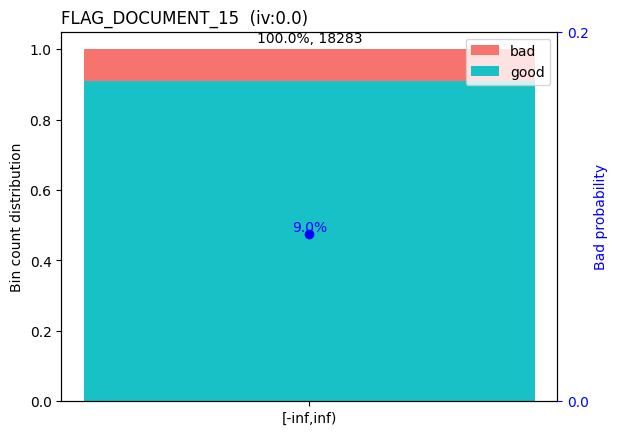

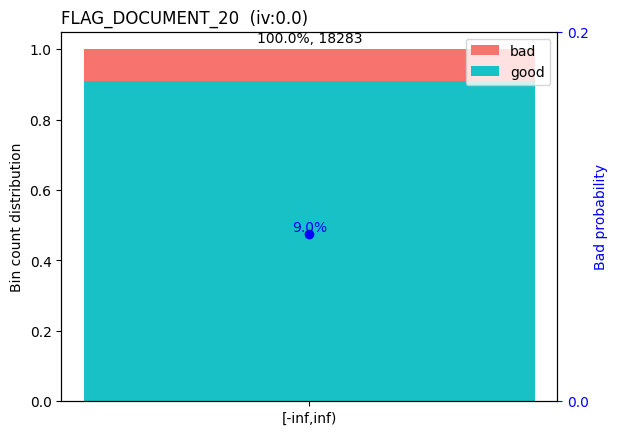

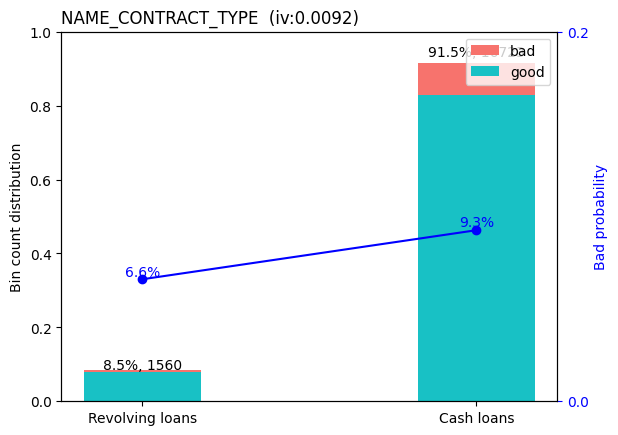

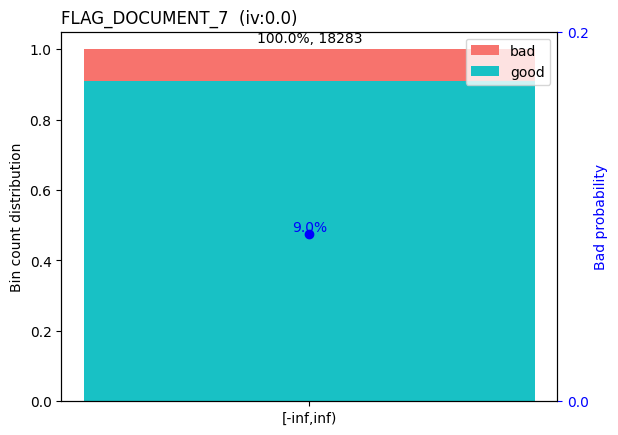

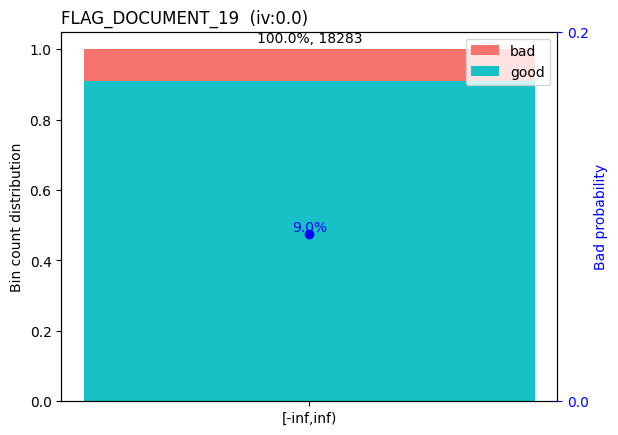

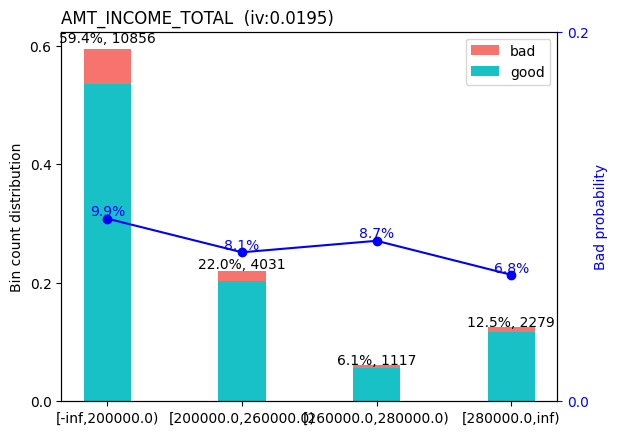

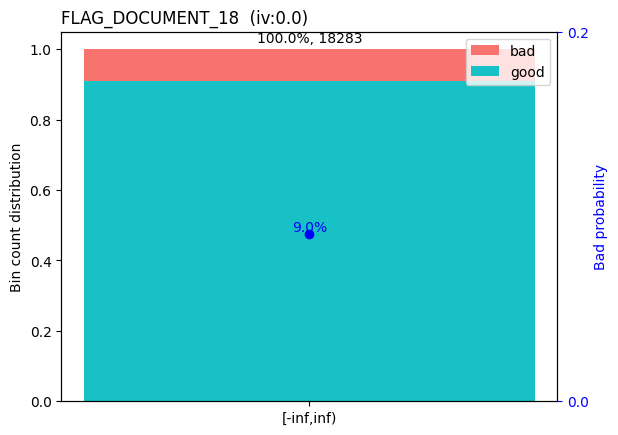

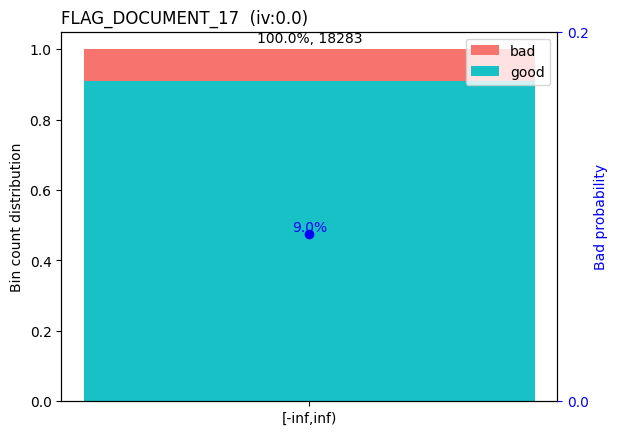

In [48]:
sc.woebin_plot(bins)

In [49]:
=0 
FD 5,21, 18, 13, 6
AMT_REQ_CREDIT_BUREAU_HOUR,
REG_CITY_NOT_LIVE_CITY
FLAG_CONT_MOBILE
AMT_REQ_CREDIT_BUREAU_DAY

<0
CNT_CHILDREN
HOUR_APPR_PROCESS_START
AMT_REQ_CREDIT_BUREAU_MON
NAME_FAMILY_STATUS
LIVE_REGION_NOT_WORK_REGION
NAME_EDUCATION_TYPE
FLAG_DOCUMENT_8
REGION_POPULATION_RELATIVE

0.1< x < 0.3
OWN_CAR_AGE
EXT_SOURCE_3
DAYS_EMPLOYED


0.3< x< 0.5
Org type - 0.6
>


SyntaxError: ignored

In [50]:
# df_filtered_forsc.info()

### Logistic regression with WOE encoding

Do train-test split

Use sc.woebin_ply to encode the WOE values

Generate the logistic regression model based on the encoded WOE values

In [51]:

# df_filtered_forsc.drop(columns = ['FLAG_OWN_CAR', 'OCCUPATION_TYPE'], inplace=True)

In [52]:
# sample code
# split data into 70% train and 30% test 1= bad result
train, test = sc.split_df(df_filtered_forsc, 'STATUS', ratio=0.7).values()
print(train.shape)
print(test.shape)

(12798, 55)
(5485, 55)


In [53]:
# sample code
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


FLAG_DOCUMENT_2  STATUS  FLAG_DOCUMENT_10 FLAG_OWN_CAR  DAYS_REGISTRATION_woe  REG_CITY_NOT_LIVE_CITY_woe  FLAG_DOCUMENT_21_woe  FLAG_DOCUMENT_3_woe  AMT_CREDIT_woe  FLAG_PHONE_woe  DAYS_BIRTH_woe  DAYS_LAST_PHONE_CHANGE_woe  REGION_POPULATION_RELATIVE_woe  NAME_EDUCATION_TYPE_woe  FLAG_EMAIL_woe  DAYS_EMPLOYED_woe  FLAG_DOCUMENT_5_woe  EXT_SOURCE_3_woe  FLAG_DOCUMENT_13_woe  FLAG_DOCUMENT_16_woe  REG_REGION_NOT_WORK_REGION_woe  OBS_30_CNT_SOCIAL_CIRCLE_woe  REGION_RATING_CLIENT_woe  FLAG_DOCUMENT_4_woe  REG_REGION_NOT_LIVE_REGION_woe  FLAG_EMP_PHONE_woe  NAME_TYPE_SUITE_woe  FLAG_DOCUMENT_9_woe  DAYS_ID_PUBLISH_woe  FLAG_DOCUMENT_11_woe  EXT_SOURCE_2_woe  NAME_HOUSING_TYPE_woe  OCCUPATION_TYPE_woe  REG_CITY_NOT_WORK_CITY_woe  NAME_INCOME_TYPE_woe  HOUR_APPR_PROCESS_START_woe  OWN_CAR_AGE_woe  FLAG_WORK_PHONE_woe  FLAG_DOCUMENT_6_woe  CNT_CHILDREN_woe  WEEKDAY_APPR_PROCESS_START_woe  FLAG_OWN_REALTY_woe  FLAG_DOCUMENT_8_woe  DEF_30_CNT_SOCIAL_CIRCLE_woe  FLAG_DOCUMENT_14_woe  \
13                    0       0                 0            Y               0.210309                   -0.032226                   0.0             0.075758       -0.161596        0.029065       -0.028314                    0.137993                        0.029784                 0.058146       -0.005172          -0.229314                  0.0         -0.649700                   0.0                   0.0                        0.004823                     -0.028462                 -0.037452                  0.0                             0.0                 0.0             0.002875                  0.0            -0.203698                   0.0         -0.280789              -0.031729             0.110967                   -0.020270              0.055324                    -0.039898         0.166628            -0.024517                  0.0          0.095847                       -0.008068            -0.088317             0.026421                     -0.049221                   0.0   
124                   0       0                 0            Y               0.210309                   -0.032226                   0.0             0.075758        0.222140        0.029065       -0.028314                   -0.153387                        0.029784                 0.058146       -0.005172          -0.229314                  0.0         -0.649700                   0.0                   0.0                        0.004823                      0.100643                 -0.037452                  0.0                             0.0                 0.0            -0.076247                  0.0             0.023967                   0.0         -0.843031              -0.031729             0.042267                   -0.020270              0.055324                    -0.039898        -0.123211            -0.024517                  0.0          0.095847                       -0.008068             0.040103             0.026421                     -0.049221                   0.0   
128                   0       0                 0            Y               0.005202                   -0.032226                   0.0             0.075758        0.222140        0.029065        0.334710                    0.137993                       -0.123258                 0.058146       -0.005172           0.272494                  0.0          1.037970                   0.0                   0.0                        0.004823                      0.005276                 -0.037452                  0.0                             0.0                 0.0            -0.076247                  0.0             0.023967                   0.0          1.033871              -0.031729             0.110967                   -0.020270              0.055324                    -0.147275        -0.295478            -0.024517                  0.0         -0.021907                       -0.008068            -0.088317             0.026421                     -0.049221                   0.0   
142 

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12798 entries, 13 to 307494
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FLAG_DOCUMENT_2                 12798 non-null  int64  
 1   FLAG_DOCUMENT_10                12798 non-null  int64  
 2   FLAG_OWN_CAR                    12798 non-null  object 
 3   DAYS_REGISTRATION_woe           12798 non-null  float64
 4   REG_CITY_NOT_LIVE_CITY_woe      12798 non-null  float64
 5   FLAG_DOCUMENT_21_woe            12798 non-null  float64
 6   FLAG_DOCUMENT_3_woe             12798 non-null  float64
 7   AMT_CREDIT_woe                  12798 non-null  float64
 8   FLAG_PHONE_woe                  12798 non-null  float64
 9   DAYS_BIRTH_woe                  12798 non-null  float64
 10  DAYS_LAST_PHONE_CHANGE_woe      12798 non-null  float64
 11  REGION_POPULATION_RELATIVE_woe  12798 non-null  float64
 12  NAME_EDUCATION_TYPE_woe       

In [69]:
X_train.dtypes[X_train.dtypes == 'object'] == 'True'

FLAG_OWN_CAR    False
dtype: bool

In [70]:
X_train.drop(columns = ['FLAG_OWN_CAR', 'OCCUPATION_TYPE_woe'])

FLAG_DOCUMENT_2  FLAG_DOCUMENT_10  DAYS_REGISTRATION_woe  REG_CITY_NOT_LIVE_CITY_woe  FLAG_DOCUMENT_21_woe  FLAG_DOCUMENT_3_woe  AMT_CREDIT_woe  FLAG_PHONE_woe  DAYS_BIRTH_woe  DAYS_LAST_PHONE_CHANGE_woe  REGION_POPULATION_RELATIVE_woe  NAME_EDUCATION_TYPE_woe  FLAG_EMAIL_woe  DAYS_EMPLOYED_woe  FLAG_DOCUMENT_5_woe  EXT_SOURCE_3_woe  FLAG_DOCUMENT_13_woe  FLAG_DOCUMENT_16_woe  REG_REGION_NOT_WORK_REGION_woe  OBS_30_CNT_SOCIAL_CIRCLE_woe  REGION_RATING_CLIENT_woe  FLAG_DOCUMENT_4_woe  REG_REGION_NOT_LIVE_REGION_woe  FLAG_EMP_PHONE_woe  NAME_TYPE_SUITE_woe  FLAG_DOCUMENT_9_woe  DAYS_ID_PUBLISH_woe  FLAG_DOCUMENT_11_woe  EXT_SOURCE_2_woe  NAME_HOUSING_TYPE_woe  OCCUPATION_TYPE_woe  REG_CITY_NOT_WORK_CITY_woe  NAME_INCOME_TYPE_woe  HOUR_APPR_PROCESS_START_woe  OWN_CAR_AGE_woe  FLAG_WORK_PHONE_woe  FLAG_DOCUMENT_6_woe  CNT_CHILDREN_woe  WEEKDAY_APPR_PROCESS_START_woe  FLAG_OWN_REALTY_woe  FLAG_DOCUMENT_8_woe  DEF_30_CNT_SOCIAL_CIRCLE_woe  FLAG_DOCUMENT_14_woe  \
13                    0                 0               0.210309                   -0.032226                   0.0             0.075758       -0.161596        0.029065       -0.028314                    0.137993                        0.029784                 0.058146       -0.005172          -0.229314                  0.0         -0.649700                   0.0                   0.0                        0.004823                     -0.028462                 -0.037452                  0.0                             0.0                 0.0             0.002875                  0.0            -0.203698                   0.0         -0.280789              -0.031729             0.110967                   -0.020270              0.055324                    -0.039898         0.166628            -0.024517                  0.0          0.095847                       -0.008068            -0.088317             0.026421                     -0.049221                   0.0   
124                   0                 0               0.210309                   -0.032226                   0.0             0.075758        0.222140        0.029065       -0.028314                   -0.153387                        0.029784                 0.058146       -0.005172          -0.229314                  0.0         -0.649700                   0.0                   0.0                        0.004823                      0.100643                 -0.037452                  0.0                             0.0                 0.0            -0.076247                  0.0             0.023967                   0.0         -0.843031              -0.031729             0.042267                   -0.020270              0.055324                    -0.039898        -0.123211            -0.024517                  0.0          0.095847                       -0.008068             0.040103             0.026421                     -0.049221                   0.0   
128                   0                 0               0.005202                   -0.032226                   0.0             0.075758        0.222140        0.029065        0.334710                    0.137993                       -0.123258                 0.058146       -0.005172           0.272494                  0.0          1.037970                   0.0                   0.0                        0.004823                      0.005276                 -0.037452                  0.0                             0.0                 0.0            -0.076247                  0.0             0.023967                   0.0          1.033871              -0.031729             0.110967                   -0.020270              0.055324                    -0.147275        -0.295478            -0.024517                  0.0         -0.021907                       -0.008068            -0.088317             0.026421                     -0.049221                   0.0   
142                   0                 0               0.210309                   -0.03

In [65]:
y_train.value_counts()

0    11642
1     1156
Name: STATUS, dtype: int64

In [68]:
y_train.info()

AttributeError: ignored

In [66]:
# sample code
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,train_woe.columns != 'STATUS']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

ValueError: ignored

### Generate scorecard

Use sc.scorecard to generate the scorecard

In [ ]:
# sample code

# generate a card from the model and bins
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

In [ ]:
# card['bin points']

### Test scorecard

Use sc.scorecard_ply to score a new application with values
- LOAN = 88900
- VALUE = 57264
- REASON = DebtCon
- JOB = Other
- YOJ = 16.0
- DEROG = 0.0
- DELINQ = 0.0
- CLAGE = 221.8
- NINQ = 0.0
- CLNO = 16.0
- DEBTINC = 36.1

In [ ]:
# # sample code

# # calulate credit score for new application
# col = ['LOAN','VALUE','REASON','JOB','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
# val = [[88900,57264,'DebtCon','Other',16.0,0.0,0.0,221.8,0.0,16.0,36.1]]
# new_appl = pd.DataFrame(val, columns=col)

# new_appl_score = sc.scorecard_ply(new_appl, card, only_total_score=False).transpose()
# new_appl_score.index = new_appl_score.index.str.replace('_points', '')

# summary =  pd.concat([new_appl.transpose(), new_appl_score], axis=1)
# summary.columns = ['App Value','Points']
# print(summary)



### Score all the test and train data

Use sc.scorecard_ply to score all the test and train data and examine the distribution of the scores

In [ ]:
# sample code

# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

**Calculate Percentage Correctly Classified measures on LR model**

In [ ]:
# sample code
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))



**Evaluate the performance of logistic regression model with ROC**

Generate the ROC and calculate the AUC for the model using the scorecardpy methods. 

In [ ]:
# sample code 

# evaluate the performance of the logistic regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type=['roc'], title = "train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type=['roc'], title = "test")

**Evaluate the performance of logistic regression model with ROC**

1. Go to where WOE and IV are calculated and find which variables have weak IV.  *Hint: check bin_iv column where <0.1*

2. Look at the scorecard and check what the difference in points bretween the range of values for those variables.  What is the largest range difference?

3. Go back to where MORTDUE was dropped and also drop the weak IV variables there, rerun the model and performance evaluation.  How did dropping those variable have a significant affect the model's performance?  


In [ ]:
df_filtered_forsc.columns